In [1]:
#Setting book theme
!jt -t gruvboxd -ofs 10 -tfs 10


# **Milestone 1**

### **Context:**

In the Indian Market, pre-owned car sales have grown and begun to pass new-car sales in recent years. While there is a fairly standard procedure for manufacturers and dealerships to set the price on new-vehicles, the pre-owned market does not have pricing models put in place. A variety of factors, such as mileage, brand, model, year, and others, all play a role in helping a used-car owner to set this price.

A tech-start up, Cars4U has set out to interpret these factors into a model that can accurately predict the value of a pre-owned car to take advantage of this growing market.


### **The objective:**

A model needs to be developed to take features of a pre-owend vehicle and assign an accurate market value to it for use on the Cars4U platform.

### **The key questions:**


 * Which features of the vehicle are most critical when determining the price of the car?
 * WHich features of the vehicle are not critical in determining the price of the car?


### **The problem formulation**:

With the information available to us currently, can a strong and accurate model be created?
 * Linear Regression modeling will be checked and tuned first
 * Decision Tree modeling will be checked and tuned as well

## **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 
 * (**Target Variable**)

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook will give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdown cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they wish to explore different techniques. 

# **Milestone 1** 

### **Loading libraries**

In [2]:
# Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

### **Let us load the data**

In [3]:
df = []
df = pd.read_csv("used_cars.csv")

### **Understand the data by observing a few rows**

In [4]:
# View first 5 rows
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [5]:
# View last 5 rows 
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observations and Insights:**
 * There appears to be several missing calues in the New_price and Price column of the data set. 
     * May be a able to find the New_price info from other lines with the same name, year, location, and fuel_type columns.
 * Column S.No. appears to just be a repeat of the index column. If this holds, this column can be deleted.

### **Let us check the data types and and missing values of each column** 

In [6]:
# Check the datatypes of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [7]:
# Check total number of missing values of each column.
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

In [8]:
# Check % of missing values.
df.isnull().sum()/len(df)

S.No.                0.000000
Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000276
Engine               0.006342
Power                0.024128
Seats                0.007307
New_price            0.861299
Price                0.170136
dtype: float64

In [9]:
#Check for dupliate rows
df.duplicated().sum()

0

In [10]:
#Rename serial number column to remove "." 
df.rename(columns = {"S.No.":"S_No"}, inplace = True)
df.head()


,S_No,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [11]:
# Checking for unique values in the Serial Number column
df.S_No.nunique()

7253

We can observe that `S.No.` has no null values. Also the number of unique values are equal to the number of observations. So, `S.No.` looks like an index for the data entry and such a column would not be useful in providing any predictive power for our analysis. Hence, it can be dropped.

In [12]:
# Remove S.No. column from data. Hint: Use inplace = True
df.drop("S_No", axis = 1, inplace = True)

In [13]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [14]:
data = df.copy()
Make = []
Model = []
Car_Info = []
for i in np.arange(0, len(df.Name)):
    holder = df.Name[i].split()
    Make.append(holder[0])
    Model.append(holder[1])
    Car_Info.append(" ".join(holder[2:]))
data["Make"] = Make
data["Model"] = Model
data["Car_Info"] = Car_Info
data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon,R LXI CNG
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta,1.6 CRDi SX Option
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz,V
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga,VDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4,New 2.0 TDI Multitronic
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,NaN,2.35,Hyundai,EON,LPG Era Plus Option
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,3.50,Nissan,Micra,Diesel XV
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21.00,17.50,Toyota,Innova,Crysta 2.8 GX AT 8S
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.20,Volkswagen,Vento,Diesel Comfortline
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,NaN,1.95,Tata,Indica,Vista Quadrajet LS


In [15]:
# Checking
filterdf = data[(data.Make == "Maruti") & (data.Model == "Wagon") & (data.Location == "Mumbai")]
filterdf.sort_values("Year", ascending = False)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info
5606,Maruti Wagon R ZXI AMT 1.2,Mumbai,2019,600,Petrol,Automatic,First,21.50,1197.0,81.80,5.0,6.80,6.25,Maruti,Wagon,R ZXI AMT 1.2
4300,Maruti Wagon R VXI AMT,Mumbai,2018,1997,Petrol,Automatic,First,22.50,998.0,67.00,5.0,6.14,4.45,Maruti,Wagon,R VXI AMT
7056,Maruti Wagon R AMT VXI,Mumbai,2017,21000,Petrol,Automatic,First,20.51,998.0,67.00,5.0,NaN,NaN,Maruti,Wagon,R AMT VXI
4682,Maruti Wagon R AMT VXI,Mumbai,2016,9000,Petrol,Automatic,First,20.51,998.0,67.00,5.0,NaN,4.25,Maruti,Wagon,R AMT VXI
214,Maruti Wagon R AMT VXI,Mumbai,2016,8500,Petrol,Automatic,First,20.51,998.0,67.00,5.0,NaN,4.22,Maruti,Wagon,R AMT VXI
2589,Maruti Wagon R VXI AMT,Mumbai,2016,8000,Petrol,Automatic,First,22.50,998.0,67.00,5.0,6.14,4.15,Maruti,Wagon,R VXI AMT
2245,Maruti Wagon R VXI 1.2,Mumbai,2015,55000,Petrol,Manual,First,21.50,1197.0,81.80,5.0,5.88,3.10,Maruti,Wagon,R VXI 1.2
5450,Maruti Wagon R VXI AMT1.2,Mumbai,2015,26000,Petrol,Automatic,First,21.50,1197.0,81.80,5.0,6.43,3.65,Maruti,Wagon,R VXI AMT1.2
5655,Maruti Wagon R LXI CNG,Mumbai,2015,22001,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,3.65,Maruti,Wagon,R LXI CNG
6607,Maruti Wagon R LXI,Mumbai,2014,12000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,NaN,Maruti,Wagon,R LXI


## **Exploratory Data Analysis**

### **Let us now explore the summary statistics of numerical variables**

In [16]:
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0


**Observations and Insights:**
 * Numerical:
   * Minimum kilometers driven is 171, so there are no brand new cars in the data set.
   * The mean Price of a vehicle is less than half of the pre-owened sale price, indicating large depreciation of value after being driven.
   * The minimum mileage for a car is 0 - this does not make sense as a car with 0 mileage would not move. This may be an error in the data and should be further reviwed for other errors.
   * The average car has 5 seats, indicating a typical 2 in front and 3 in back style. This is the style that the 1st through 3rd quartile of the data follows. Minimum is a two seater, and max seats 10.
   * Data set shows cars built between 1996 and 2019.
 * Categorical:
   * 2041 different types of cars sold at 11 different locations
   * Two types of transmissions
     * Automatic, Manual
   * Five fuel-types for the cars
     * Diesel, Petrol, LPG, Electric, and CNG
   * Four owner types:
     * First, Second, Third, Fourth and Above

**Number of unique observations in each category**

In [17]:
cat_cols = data.select_dtypes(include = ['object']).columns

for column in cat_cols:
    
    print("For column:", column, "- with",data[column].nunique(),"unique values:")
    
    print(data[column].unique())
    
    print('-'*50)

For column: Name - with 2041 unique values:
['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
--------------------------------------------------
For column: Location - with 11 unique values:
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
--------------------------------------------------
For column: Fuel_Type - with 5 unique values:
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
--------------------------------------------------
For column: Transmission - with 2 unique values:
['Manual' 'Automatic']
--------------------------------------------------
For column: Owner_Type - with 4 unique values:
['First' 'Second' 'Fourth & Above' 'Third']
--------------------------------------------------
For column: Make - with 32 unique values:
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'


#### **Observations and Insights: **
 * After being split into three columns, the "Info" portion of the car descriptions is no longer useful. The model is likely not significant to later building the model, but Make/ Model together could be useful for filling in missing values from the data set. 

**Think About It**: 

- We could observe from summary statistics that kilometers_driven has extreme values. Can we look at the manufactured year for cars with extreme values for kilometers_driven? 
- Also, we could observe the feature mileage has values zero. Can the mileage of a car be zero?

**Let's explore the two points mentioned above**

**Check Kilometers_Driven extreme values**

In [18]:
# Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values("Kilometers_Driven", ascending = False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00,BMW,X5,xDrive 30d M Sport
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50,Skoda,Octavia,Ambition Plus 2.0 TDI AT
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90,Volkswagen,Vento,Diesel Highline
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70,Hyundai,i10,Magna 1.2
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00,Volkswagen,Jetta,2013-2015 2.0L TDI Highline AT
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00,Honda,City,i VTEC SV
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45,Hyundai,i20,Magna Optional 1.2
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN,Maruti,Swift,Dzire Tour LDI
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00,Tata,Indigo,LS
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00,Toyota,Innova,2.5 G (Diesel) 8 Seater BS IV


#### **Observations and Insights: **
* Top value shows KM Driven at 6.5 million km. This appears to be a data entry error with at least one "0" added to make more sense within the data set. We will replace this value to match the median value of the other vehicles of the same make, model, and year.


In [19]:
#Replacing outlier with mean of data
data.Kilometers_Driven[2328] = data[(data["Make"] == data["Make"][2328]) &
                                    (data["Model"] == data["Model"][2328]) &
                                    (data["Year"] == data["Year"][2328])]["Kilometers_Driven"].median()

In [20]:
data.sort_values("Kilometers_Driven", ascending = False).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50,Skoda,Octavia,Ambition Plus 2.0 TDI AT
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90,Volkswagen,Vento,Diesel Highline
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70,Hyundai,i10,Magna 1.2
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00,Honda,City,i VTEC SV
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00,Volkswagen,Jetta,2013-2015 2.0L TDI Highline AT
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45,Hyundai,i20,Magna Optional 1.2
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN,Maruti,Swift,Dzire Tour LDI
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00,Tata,Indigo,LS
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00,Toyota,Innova,2.5 G (Diesel) 8 Seater BS IV
6919,Isuzu D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.40,2499.0,134.00,5.0,NaN,NaN,Isuzu,D-MAX,V-Cross 4X4


**Check Mileage extreme values**

In [21]:
# Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values("Mileage",ascending = True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12,Hyundai,Santro,Xing XP
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30,Hyundai,Santro,AT
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85,Honda,City,1.5 GXI
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45,Volkswagen,Jetta,2007-2011 1.9 L TDI
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN,Land,Rover,Freelander 2 TD4 SE
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35,Hyundai,Santro,GLS I - Euro I
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17,Hyundai,Santro,Xing XP
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00,Land,Rover,Freelander 2 TD4 SE
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50,Land,Rover,Freelander 2 TD4 HSE
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15,Hyundai,Santro,GLS II - Euro II


In [22]:
data["Mileage"].value_counts()[0]

81

#### **Observations**
* Mileage of cars can not be 0, and there are 81 rows in the data set that show this value. We should treat 0's as missing values, and we will do it in the Feature Engineering part.

## **Univariate Analysis**
Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables.

## **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyse the numerical columns.

In [23]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(data, feature, figsize = (15, 10), kde = True, bins = None):
    
    """ Boxplot and histogram combined
    
    feature: 1-d feature array
    
    figsize: size of fig (default (9, 8))
    
    bins: number of bins (default None / auto)
    
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

**Let us plot histogram and box-plot for the feature 'Kilometers_Driven' to understand the distribution and outliers, if any.**

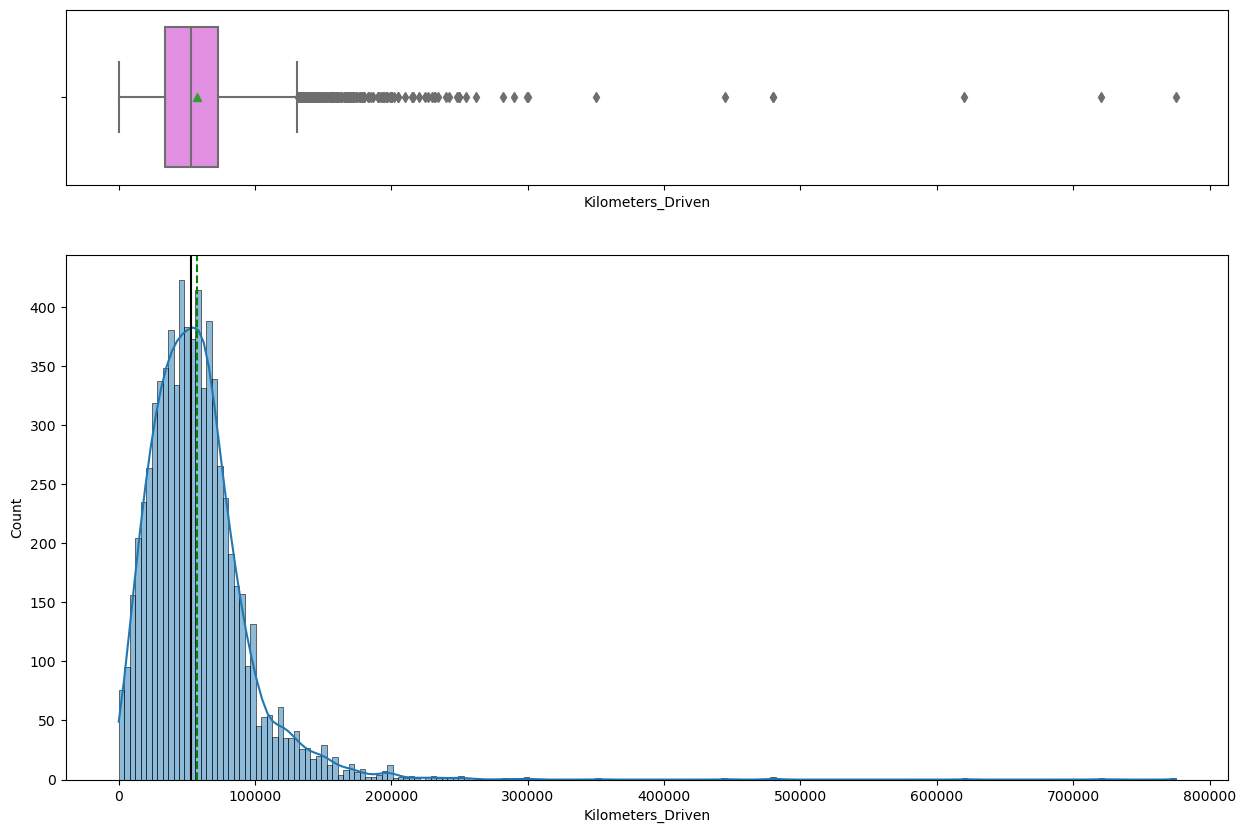

In [24]:
# Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data,"Kilometers_Driven")

In [25]:
kmskew = stats.skew(data["Kilometers_Driven"])
kmskew

3.8315292285198064

**Think About It**: Kilometers_Driven is highly right-skewed. Can we use Log transformation of the feature to reduce/remove the skewness? Why can't we keep skewed data?

### Testing three different transformation methods ###
 * LOG
 * SQRT
 * Box-Cox

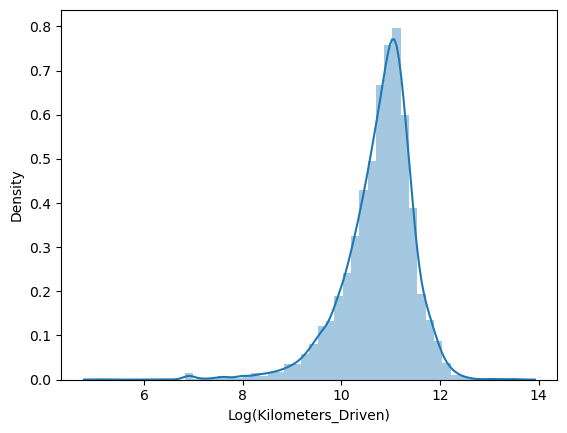

In [26]:
# Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel = "Log(Kilometers_Driven)");

In [27]:
# Testing Log, Sqr
kmdata = data[["Kilometers_Driven"]].copy()
kmdata["KM_Driven_Log"] = np.log(kmdata["Kilometers_Driven"])
kmdata["KM_Driven_SQRT"] = np.sqrt(kmdata["Kilometers_Driven"])
kmdata["KM_Driven_BC"], KM_Lambda = stats.boxcox(kmdata["Kilometers_Driven"])
kmdata.head()

,Kilometers_Driven,KM_Driven_Log,KM_Driven_SQRT,KM_Driven_BC
0,72000,11.184421,268.328157,184.125969
1,41000,10.621327,202.484567,148.032418
2,46000,10.736397,214.476106,154.791723
3,87000,11.373663,294.957624,198.103701
4,40670,10.613246,201.668044,147.568767


In [28]:
kmskew = stats.skew(kmdata["Kilometers_Driven"],nan_policy = "omit")
kmlogskew = stats.skew(kmdata["KM_Driven_Log"],nan_policy = "omit")
kmsqrtskew = stats.skew(kmdata["KM_Driven_SQRT"],nan_policy = "omit")
kmbcskew = stats.skew(kmdata["KM_Driven_BC"], nan_policy = "omit")

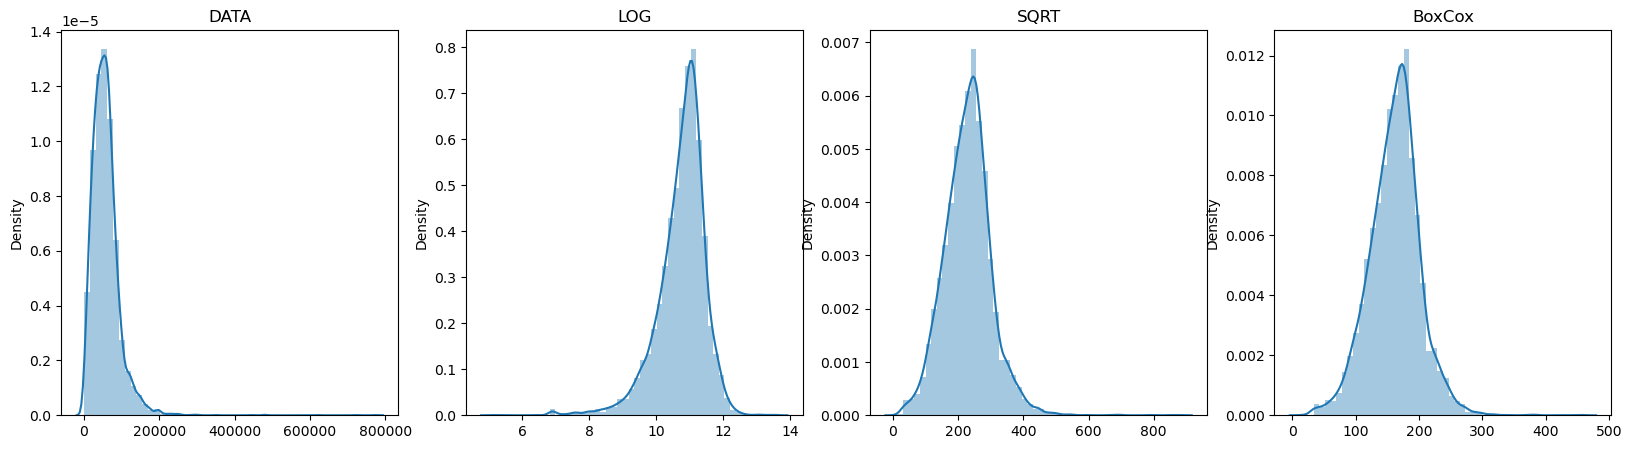

 Skew Normal = 3.8315292285198064 
 Skew LOG = -1.3531280232017435 
 Skew SQRT = 0.5461878208422749 
 Skew BOX-COX = 0.11043873077140899 



In [29]:
# Subplotting the adjustments 
fig, axes = plt.subplots(1,4, figsize = (20,5))
sns.distplot(ax = axes[0], x = kmdata["Kilometers_Driven"])
axes[0].set_title("DATA")
sns.distplot(ax = axes[1], x = kmdata["KM_Driven_Log"]);
axes[1].set_title("LOG")
sns.distplot(ax = axes[2], x = kmdata["KM_Driven_SQRT"]);
axes[2].set_title("SQRT")
sns.distplot(ax = axes[3], x = kmdata["KM_Driven_BC"]);
axes[3].set_title("BoxCox")

plt.show()

print(" Skew Normal =", kmskew, "\n",
      "Skew LOG =", kmlogskew, "\n",
      "Skew SQRT =", kmsqrtskew, "\n",
      "Skew BOX-COX =", kmbcskew, "\n",
     )

Text(0.5, 1.0, 'Kilometers_Driven - BoxCox')

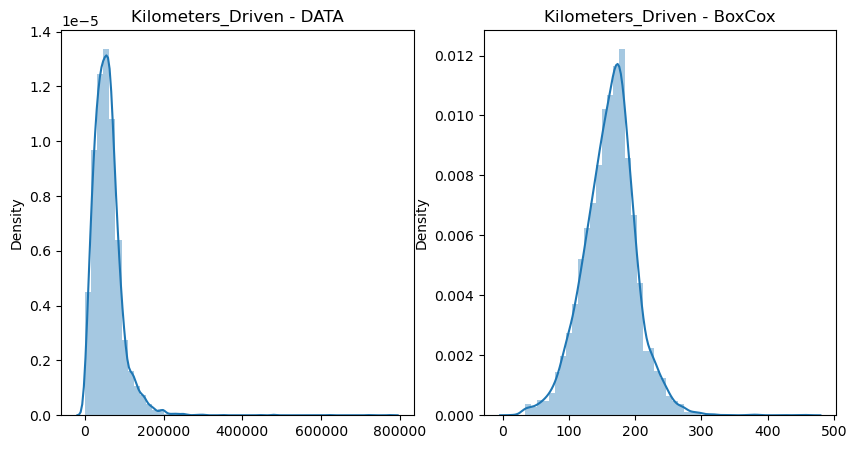

In [30]:
#Plotting main categories together for plot for report
fig, axes = plt.subplots(1,2, figsize = (10,5))
sns.distplot(ax = axes[0], x = kmdata["Kilometers_Driven"])
axes[0].set_title("Kilometers_Driven - DATA")
sns.distplot(ax = axes[1], x = kmdata["KM_Driven_BC"]);
axes[1].set_title("Kilometers_Driven - BoxCox")

In [31]:
#Retrieve lambda of BoxCox
KM_Lambda

#Reversing Box-Cox proof
from scipy.special import inv_boxcox
kmdata["Rev_BC"] = inv_boxcox(kmdata["KM_Driven_BC"],KM_Lambda)
kmdata.head(15)

,Kilometers_Driven,KM_Driven_Log,KM_Driven_SQRT,KM_Driven_BC,Rev_BC
0,72000,11.184421,268.328157,184.125969,72000.0
1,41000,10.621327,202.484567,148.032418,41000.0
2,46000,10.736397,214.476106,154.791723,46000.0
3,87000,11.373663,294.957624,198.103701,87000.0
4,40670,10.613246,201.668044,147.568767,40670.0
5,75000,11.225243,273.861279,187.056396,75000.0
6,86999,11.373652,294.955929,198.102821,86999.0
7,36000,10.491274,189.736660,140.741685,36000.0
8,64430,11.073335,253.830652,176.378754,64430.0
9,65932,11.096379,256.772273,177.959014,65932.0


**Observations and Insights:**
 * While any of the transformations do not yield a completely normal distribution, the Box-Cox method reduces the skew of the data down to the smallest value. 
 * Tested Box-Cox method lambda retrieval to verify that the data can be returned to it's original value for final use.

**Note:** Like Kilometers_Driven, the distribution of Price is also highly skewed, we can use transformation methods on this column to see if that helps normalize the distribution. And add the transformed variable into the dataset.

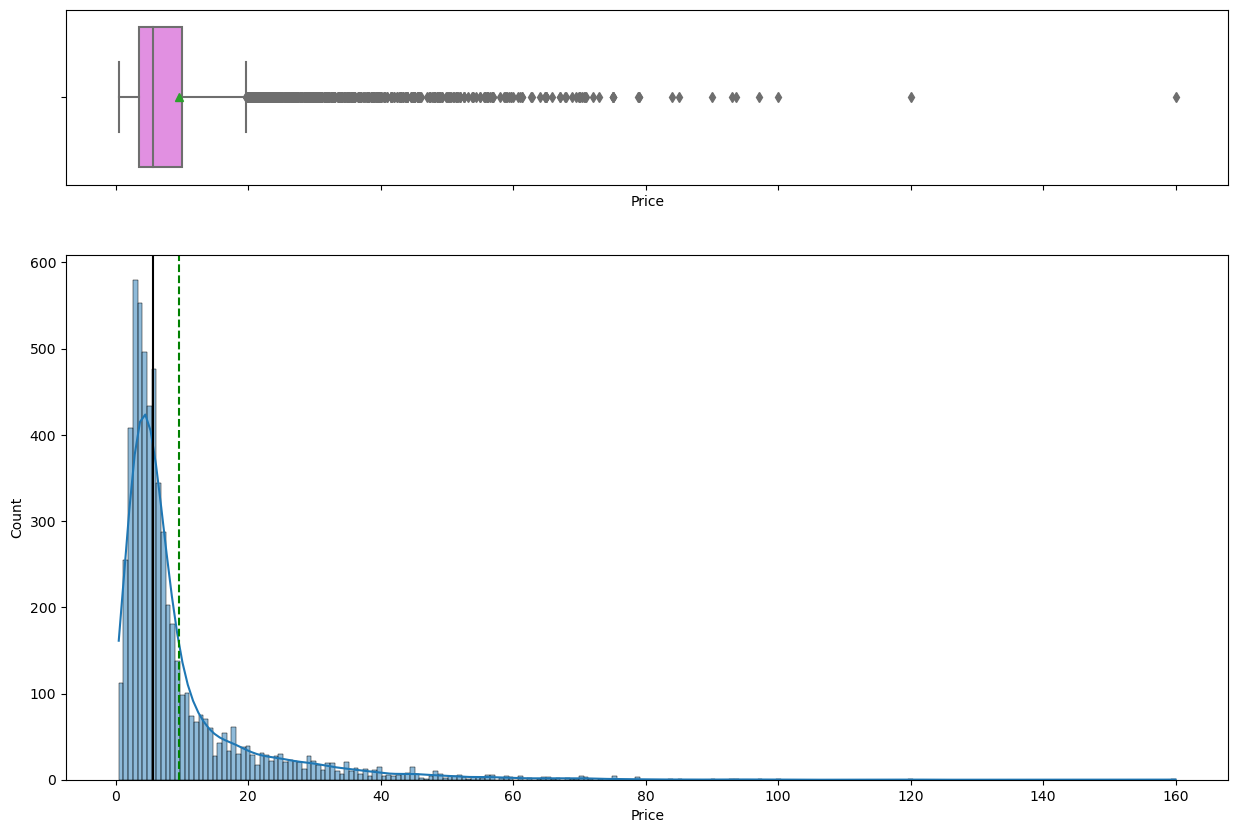

In [32]:
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data,"Price")

In [33]:
# Applying transformations of the feature 'Price'
Pricedata = data[["Price"]].copy()
Pricedata["Price_Log"] = np.log(data["Price"])
Pricedata["Price_SQRT"] = np.sqrt(data["Price"])
Pricedata["Price_BC"], Price_Lambda = stats.boxcox(data["Price"])
Pricedata.head()

,Price,Price_Log,Price_SQRT,Price_BC
0,1.75,0.559616,1.322876,1.340451e+01
1,12.50,2.525729,3.535534,2.318343e+08
2,4.50,1.504077,2.121320,4.037485e+04
3,6.00,1.791759,2.449490,4.619660e+05
4,17.74,2.875822,4.211888,4.501028e+09


In [34]:
#Calculating Skew
Priceskew = stats.skew(Pricedata["Price"],nan_policy = "omit")
Pricelogskew = stats.skew(Pricedata["Price_Log"],nan_policy = "omit")
Pricesqrtskew = stats.skew(Pricedata["Price_SQRT"],nan_policy = "omit")
Pricebcskew = stats.skew(Pricedata["Price_BC"],nan_policy = "omit")


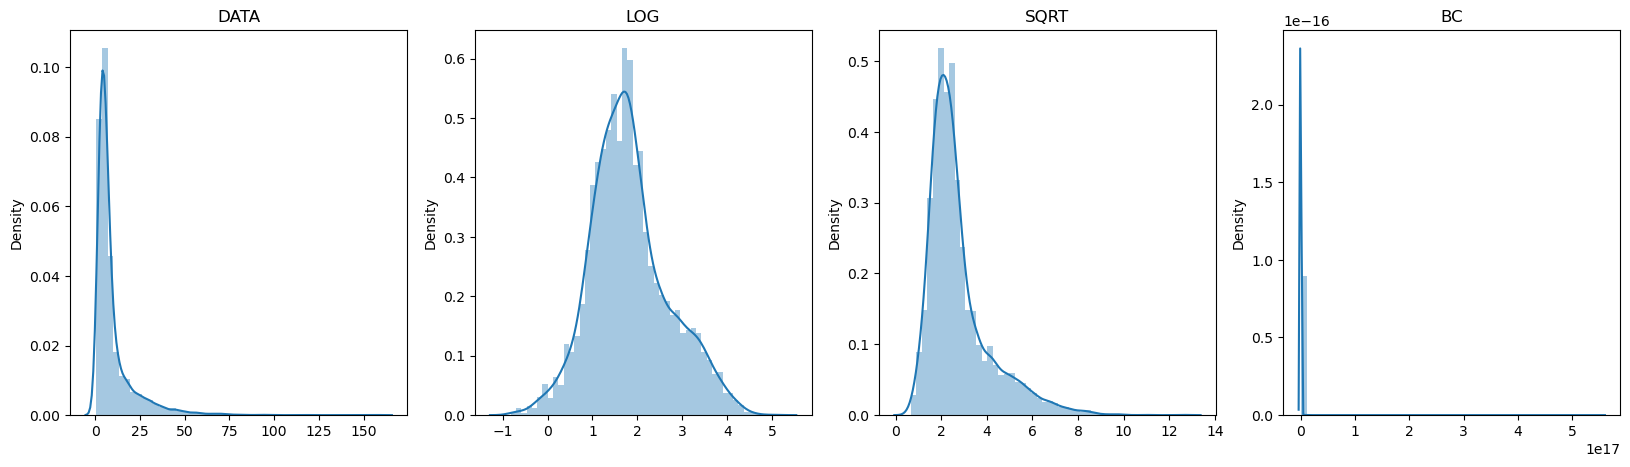

 Skew Normal = 3.3344007541820284 
 Skew LOG = 0.41728666635809036 
 Skew SQRT = 1.7024599612007534 
 Skew BOX-COX = 76.63012302265955 



In [35]:
# Subplotting the adjustments 
fig, axes = plt.subplots(1,4, figsize = (20,5))
sns.distplot(ax = axes[0], x = Pricedata["Price"]);
axes[0].set_title("DATA")
sns.distplot(ax = axes[1], x = Pricedata["Price_Log"]);
axes[1].set_title("LOG")
sns.distplot(ax = axes[2], x = Pricedata["Price_SQRT"]);
axes[2].set_title("SQRT")
sns.distplot(ax = axes[3], x = Pricedata["Price_BC"]);
axes[3].set_title("BC")

plt.show()

print(" Skew Normal =", Priceskew, "\n",
      "Skew LOG =", Pricelogskew, "\n",
      "Skew SQRT =", Pricesqrtskew, "\n",
      "Skew BOX-COX =", Pricebcskew, "\n",
     )

Text(0.5, 1.0, 'Price - LOG')

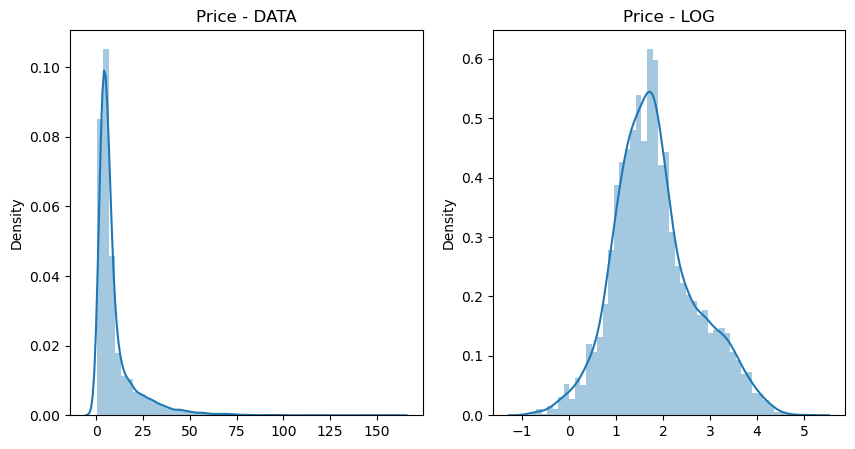

In [36]:
#Plotting main categories together for plot for report
fig, axes = plt.subplots(1,2, figsize = (10,5))
sns.distplot(ax = axes[0], x = Pricedata["Price"]);
axes[0].set_title("Price - DATA")
sns.distplot(ax = axes[1], x = Pricedata["Price_Log"]);
axes[1].set_title("Price - LOG")

In [37]:
# We can Add a transformed Kilometers Driven and Price feature in data
data["Kilometers_Driven_BC"] = kmdata["KM_Driven_BC"]
data["Price_Log"] = Pricedata["Price_Log"]
data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info,Kilometers_Driven_BC,Price_Log
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon,R LXI CNG,184.125969,0.559616
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta,1.6 CRDi SX Option,148.032418,2.525729
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz,V,154.791723,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga,VDI,198.103701,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4,New 2.0 TDI Multitronic,147.568767,2.875822


--------------------------------------------------
Mileage 
    Green = Mean of value 18.14 
    Black = Median of value 18.16 
    Skew = -0.438


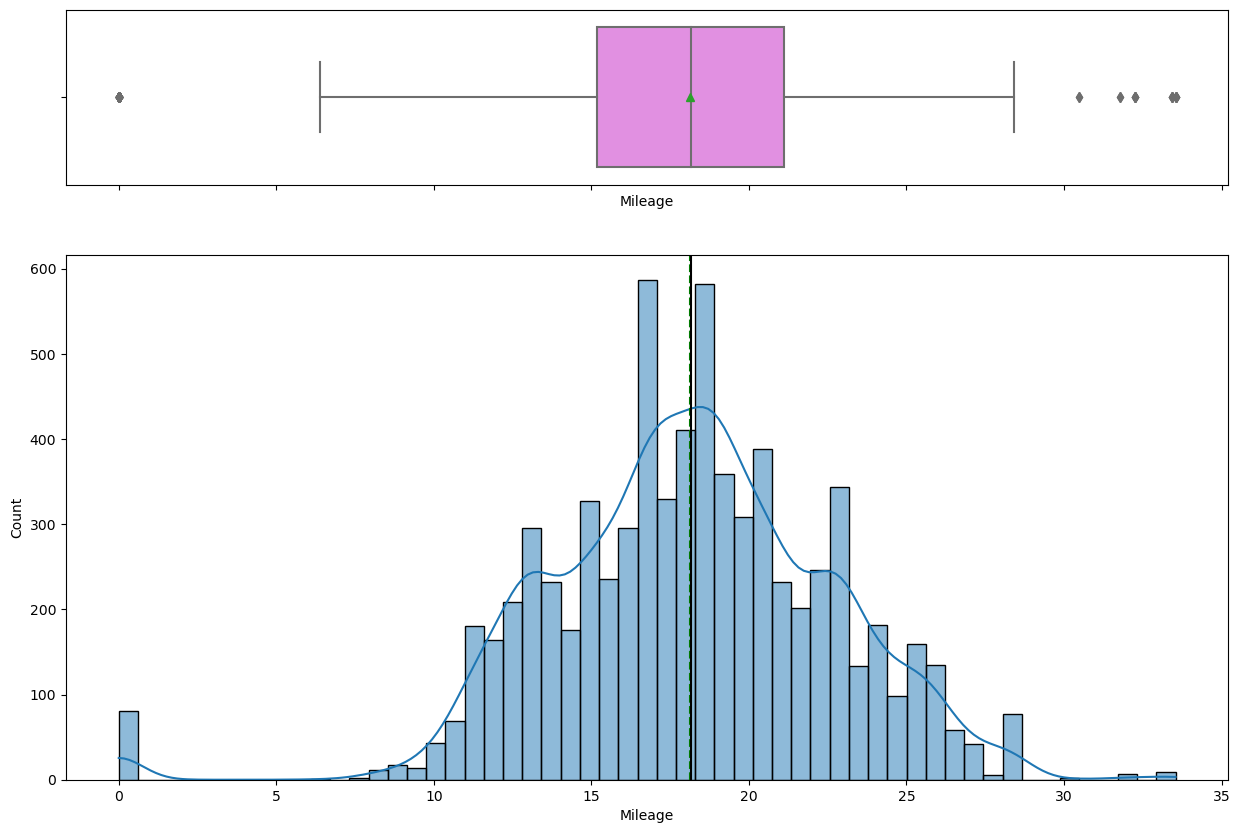

--------------------------------------------------
Engine 
    Green = Mean of value 1616.57 
    Black = Median of value 1493.0 
    Skew = 1.412


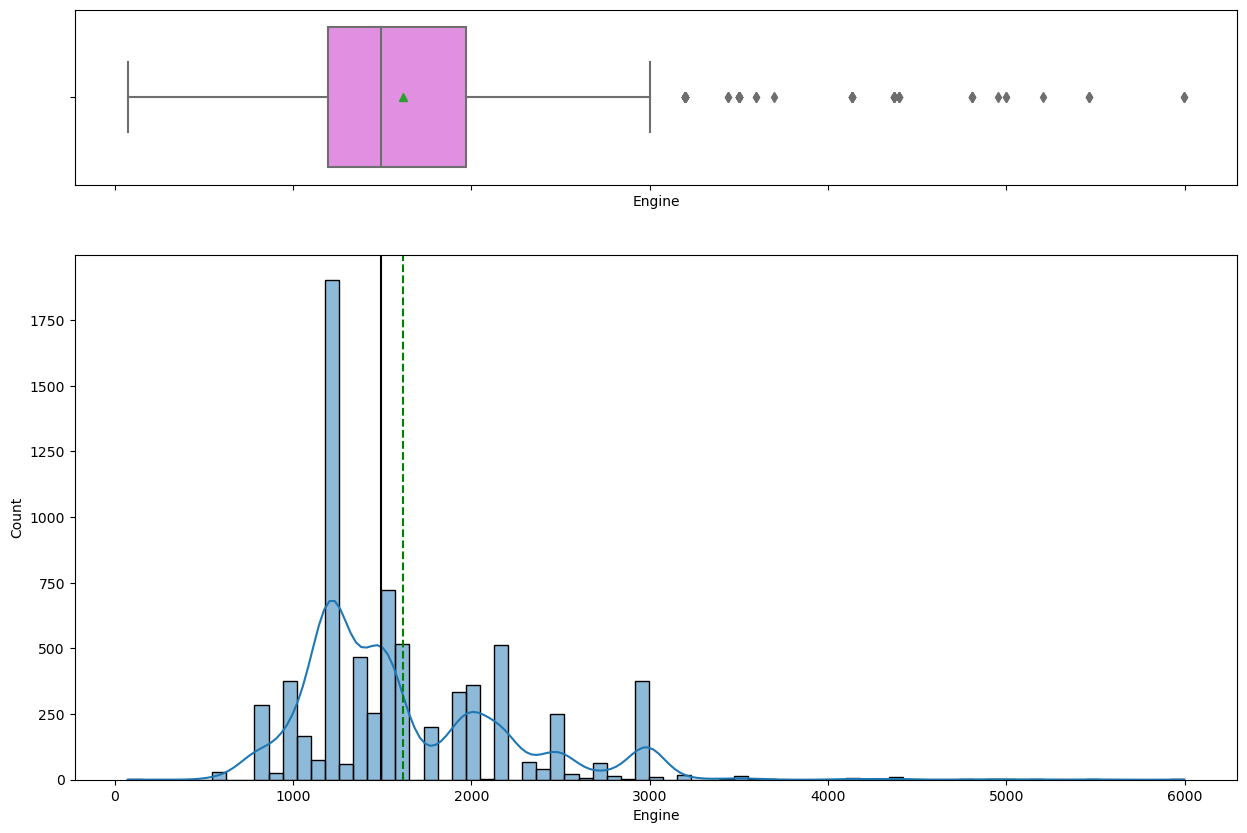

--------------------------------------------------
Power 
    Green = Mean of value 112.77 
    Black = Median of value 94.0 
    Skew = 1.961


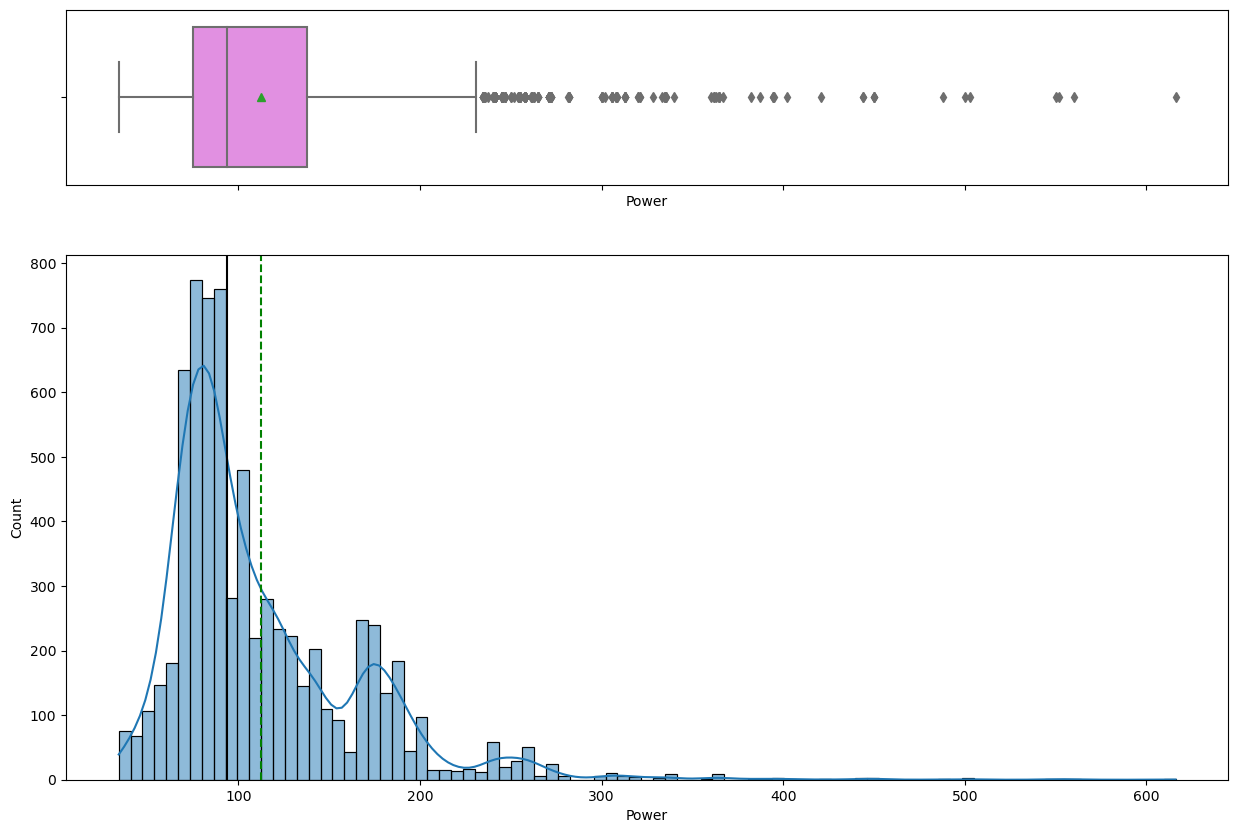

--------------------------------------------------
Seats 
    Green = Mean of value 5.28 
    Black = Median of value 5.0 
    Skew = 1.955


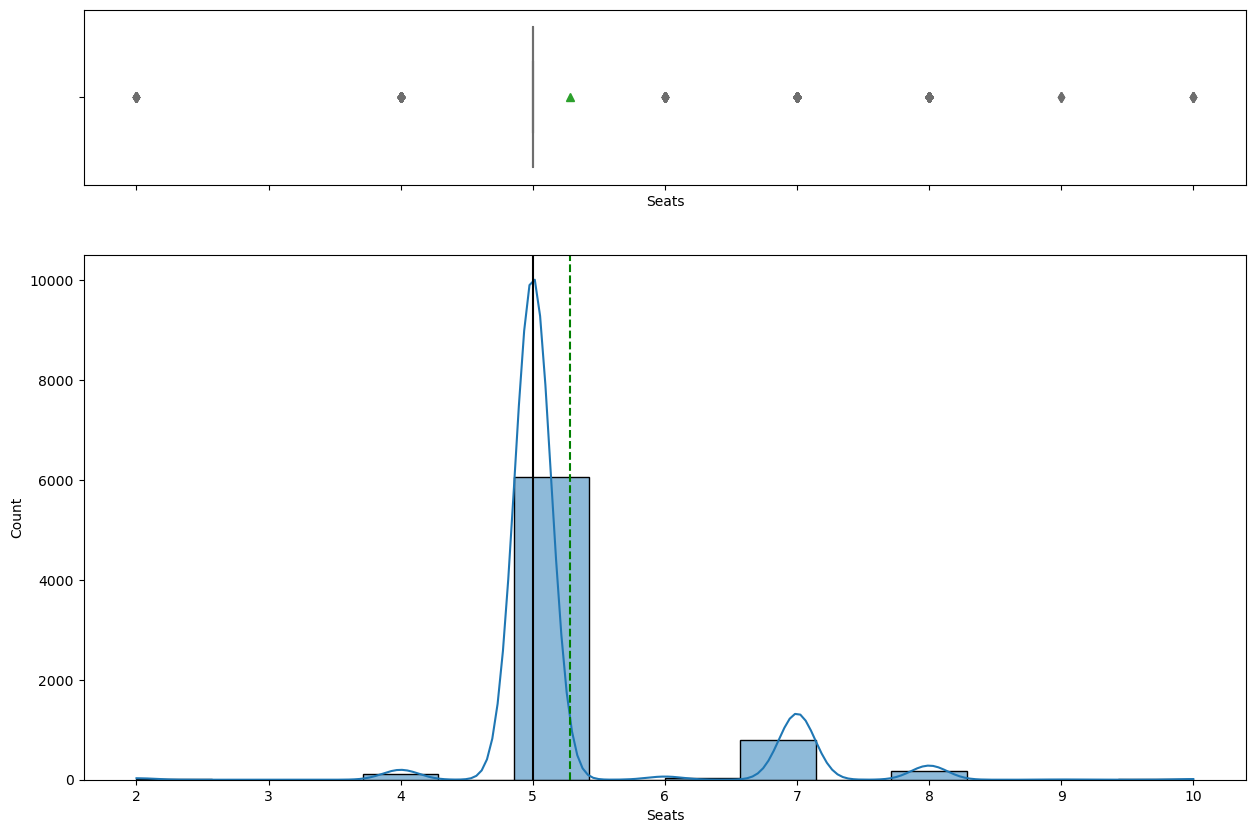

In [38]:
for col in data.columns[7 : 11]:
    print("-" * 50)
    print(col,"\n","   Green = Mean of value",round(data[col].mean(),2),"\n",
          "   Black = Median of value",round(data[col].median(),2),"\n"
          "    Skew =",round(stats.skew(data[col],nan_policy = "omit"),3)
         )                     
    histogram_boxplot(data,col)
    plt.show()

In [39]:
# Checking normality for Power as well
Prdata = data[["Power"]].copy()
Prdata["PR_Log"] = np.log(data["Power"])
Prdata["PR_SQRT"] = np.sqrt(data["Power"])
Prdata["PR_BC"], PR_Lambda = stats.boxcox(data["Power"])
Prdata.head()

,Power,PR_Log,PR_SQRT,PR_BC
0,58.16,4.063198,7.626270,1.052312e+14
1,126.20,4.837868,11.233877,7.455337e+16
2,88.70,4.485260,9.418068,3.759071e+15
3,88.76,4.485936,9.421253,3.780668e+15
4,140.80,4.947340,11.865918,1.884780e+17


In [40]:
#Calculating Skew
Prskew = stats.skew(Prdata["Power"],nan_policy = "omit")
Prlogskew = stats.skew(Prdata["PR_Log"],nan_policy = "omit")
Prsqrtskew = stats.skew(Prdata["PR_SQRT"],nan_policy = "omit")
Prbcskew = stats.skew(Prdata["PR_BC"],nan_policy = "omit")


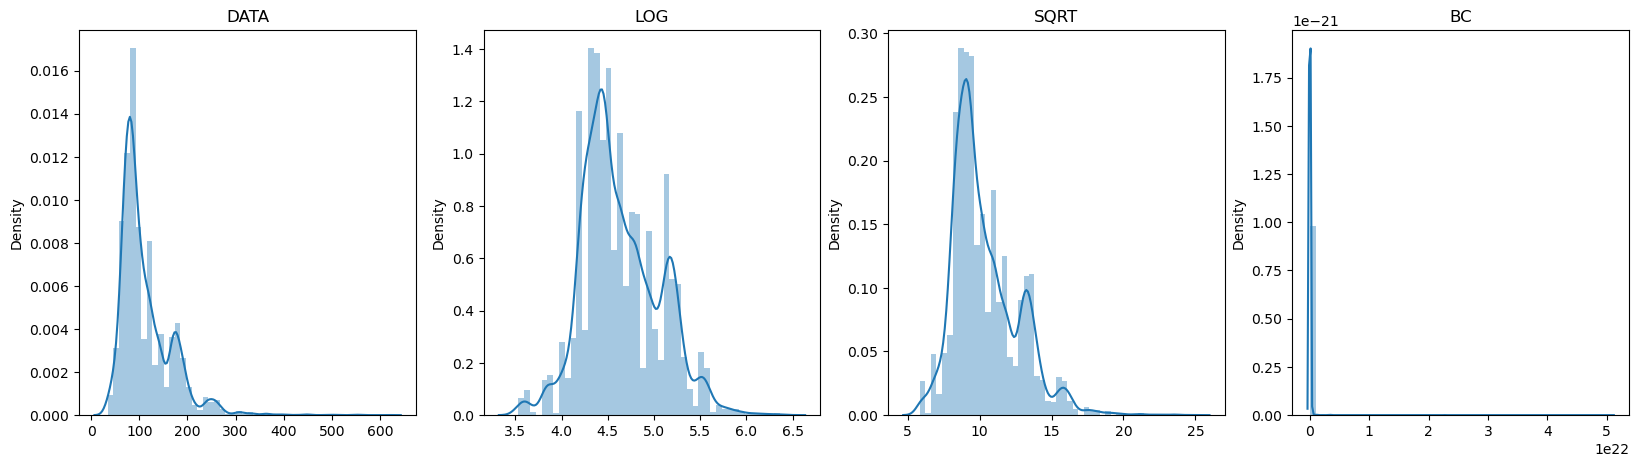

 Skew Normal = 1.9607619851161648 
 Skew LOG = 0.4444384915346796 
 Skew SQRT = 1.0861113343778754 
 Skew BOX-COX = 50.23490927312863 



In [41]:
# Subplotting the adjustments 
fig, axes = plt.subplots(1,4, figsize = (20,5))
sns.distplot(ax = axes[0], x = Prdata["Power"]);
axes[0].set_title("DATA")
sns.distplot(ax = axes[1], x = Prdata["PR_Log"]);
axes[1].set_title("LOG")
sns.distplot(ax = axes[2], x = Prdata["PR_SQRT"]);
axes[2].set_title("SQRT")
sns.distplot(ax = axes[3], x = Prdata["PR_BC"]);
axes[3].set_title("BC")

plt.show()

print(" Skew Normal =", Prskew, "\n",
      "Skew LOG =", Prlogskew, "\n",
      "Skew SQRT =", Prsqrtskew, "\n",
      "Skew BOX-COX =", Prbcskew, "\n",
     )

Text(0.5, 1.0, 'Power - LOG')

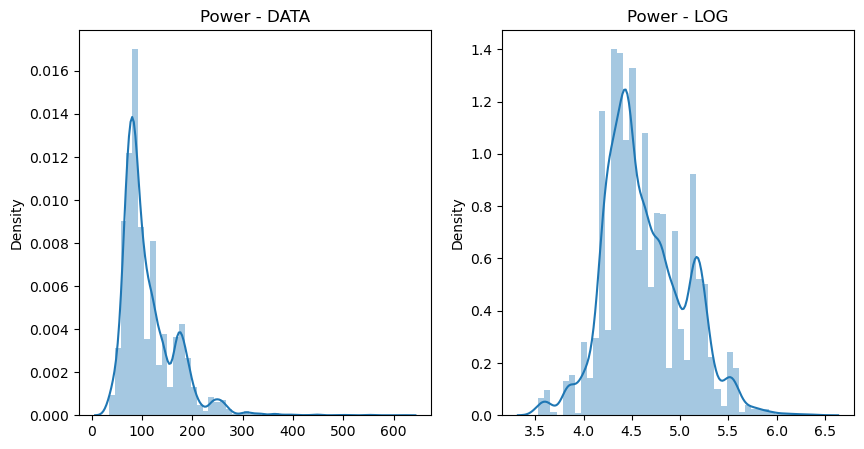

In [42]:
#Plotting main categories together for plot for report
fig, axes = plt.subplots(1,2, figsize = (10,5))
sns.distplot(ax = axes[0], x = Prdata["Power"]);
axes[0].set_title("Power - DATA")
sns.distplot(ax = axes[1], x = Prdata["PR_Log"]);
axes[1].set_title("Power - LOG")

In [43]:
#Replace Power with Power_log
data["Power_log"] = Prdata["PR_Log"]


**Note:** Try plotting histogram and box-plot for different numerical features and understand how the data looks like.

**Observations and Insights for all the plots:**
 * Power, Kilometers_Driven, and Price were all skewed, and we able to transform each data set to increase normality.
 * The overwhelming majority of cars in this data set are 5 seater cars - with the lack of diversity in the data, that may mean that this parameter will not be a helpful indicator.


## **2. Univariate analysis - Categorical Data**

In [44]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # Length of the column
    
    plt.figure(figsize = (15, 5))
    
    ax = sns.countplot(x = data[z], palette = 'Paired', order = data[z].value_counts().index)
    
    for p in ax.patches:
        
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
        
        x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
        y = p.get_y() + p.get_height()           # Hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # Annotate the percantage 
    
    plt.show() # Show the plot

**Let us plot barplot for the variable Location, Year, Fuel_Type, Transmission, and Owner_Type. It will be helpful to know the number of percentage of cars from each city.**

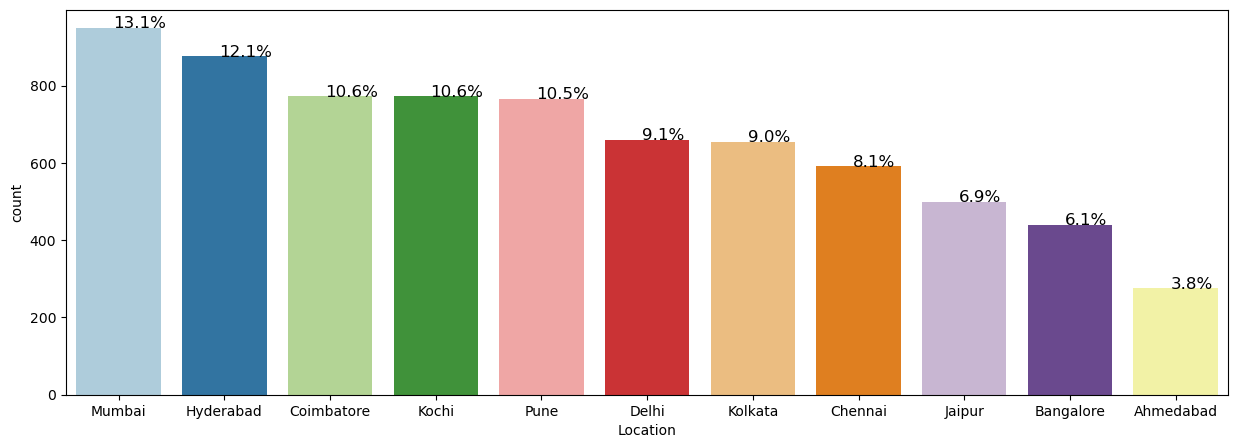

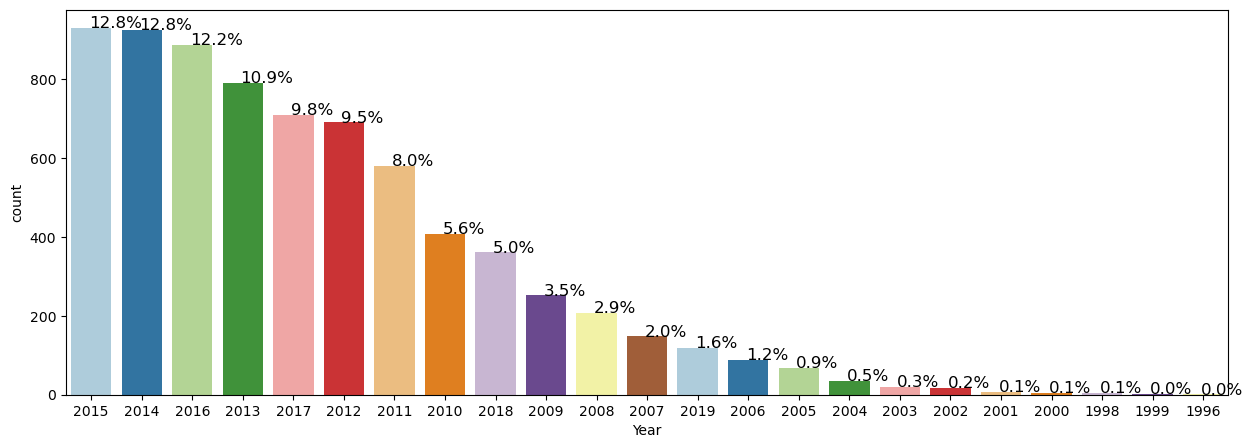

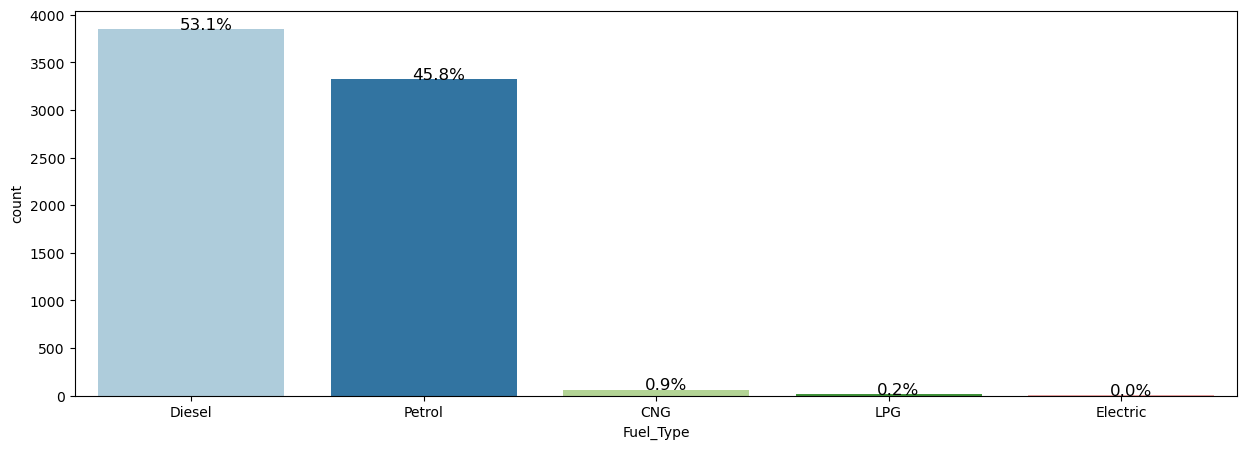

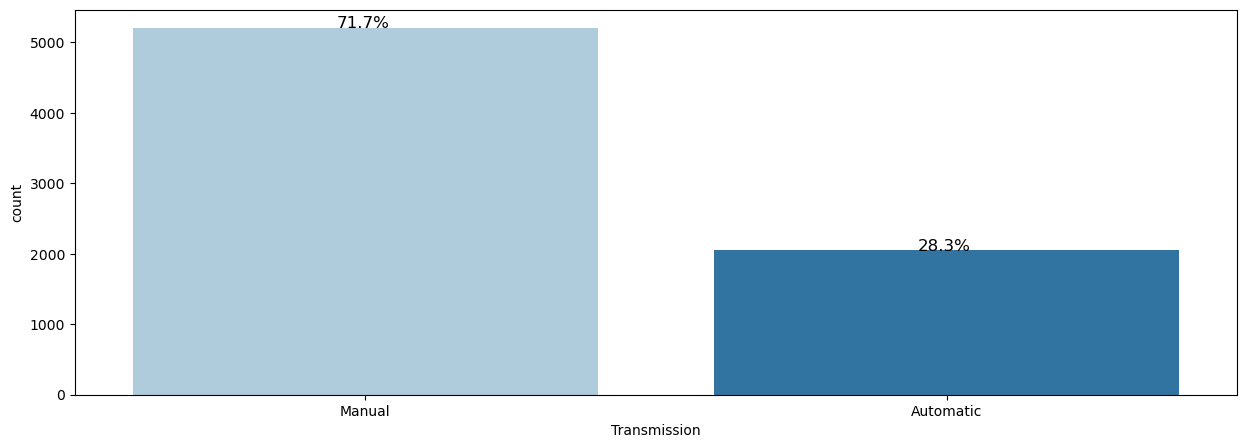

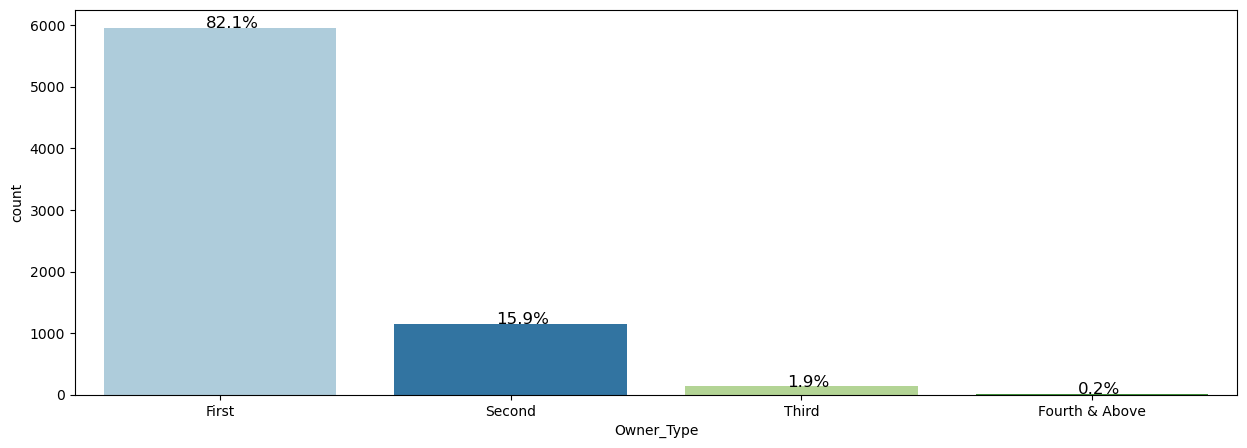

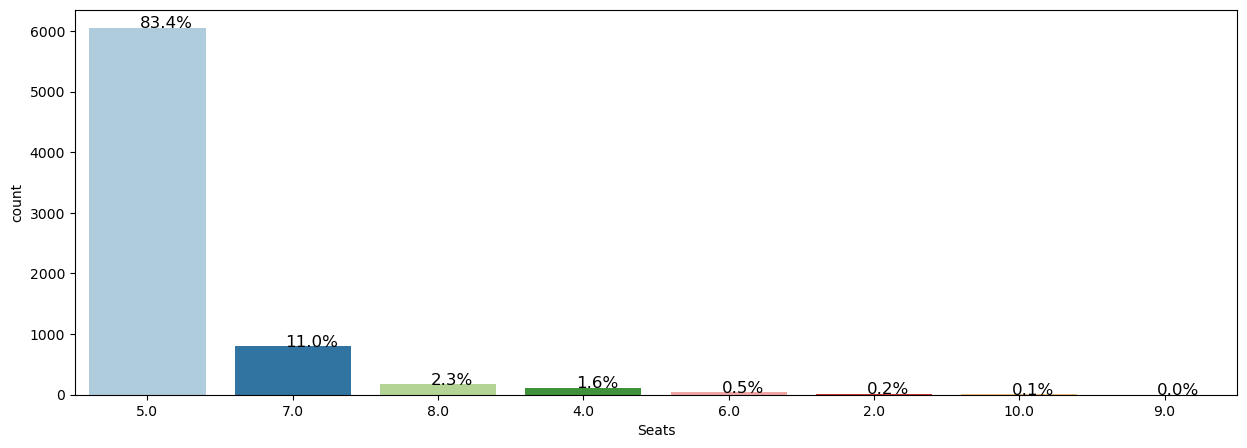

In [45]:
# Bar Plot for 'Location, Year, Fuel_Type, Transmission, Owner_Type`
perc_on_bar('Location')
perc_on_bar('Year')
perc_on_bar('Fuel_Type')
perc_on_bar('Transmission')
perc_on_bar('Owner_Type')
perc_on_bar('Seats')

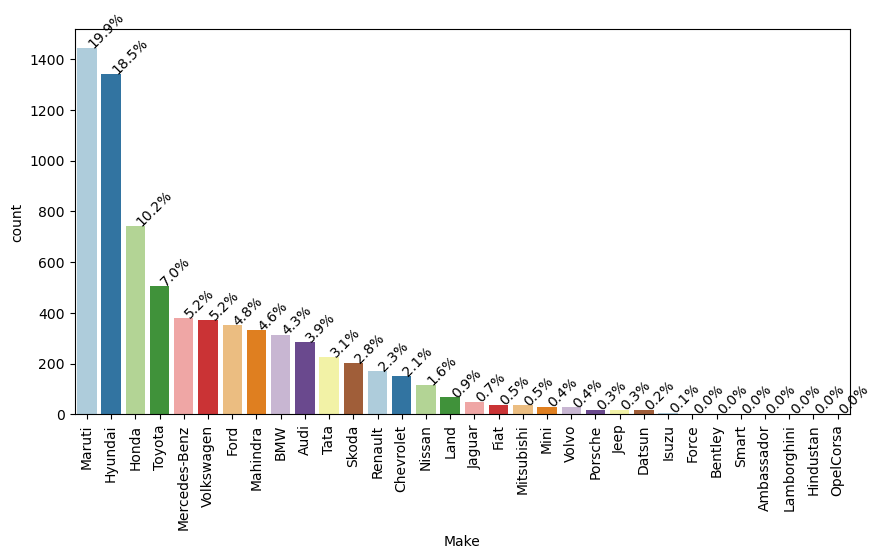

In [46]:
# Graphing Make separately  
m = "Make"
    
total = len(data[m]) # Length of the column
    
plt.figure(figsize = (10, 5))
    
ax = sns.countplot(x = data[m], palette = 'Paired', order = data[m].value_counts().index)
ax.tick_params(axis = 'x', rotation = 90)
for p in ax.patches:
        
    percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class of the category
      
    x = p.get_x() + p.get_width() / 2 - 0.05 # Width of the plot
        
    y = p.get_y() + p.get_height()           # Hieght of the plot
        
    ax.annotate(percentage, (x, y), size = 10, rotation = 45) # Annotate the percantage 
    
plt.show() # Show the plot

**Observations and Insights from all plots: **
 * Diesel and Petrol cars account for nearly all vehicles in the data set.
 * There is a roughly 70/30 split on manual to automatic cars inthe data.
 * Over 82% of resold cars are on their first time being sold, 16% on their second, and the remainder is in third or more.
 * ~80% of the resold cars were made after 2008, with about 50% of the total cars being built between 2013 and 2016.
 * Maruti and Hyundai brand vehicles account for about 40% of the vehicles in the data set.
 * Fuel_Type, Owner_Type, Transmission can also be adjusted into dummy variables.

## **Bivariate Analysis**

### **1. Heat map**
Heat map shows a 2D correlation matrix between two numerical features.

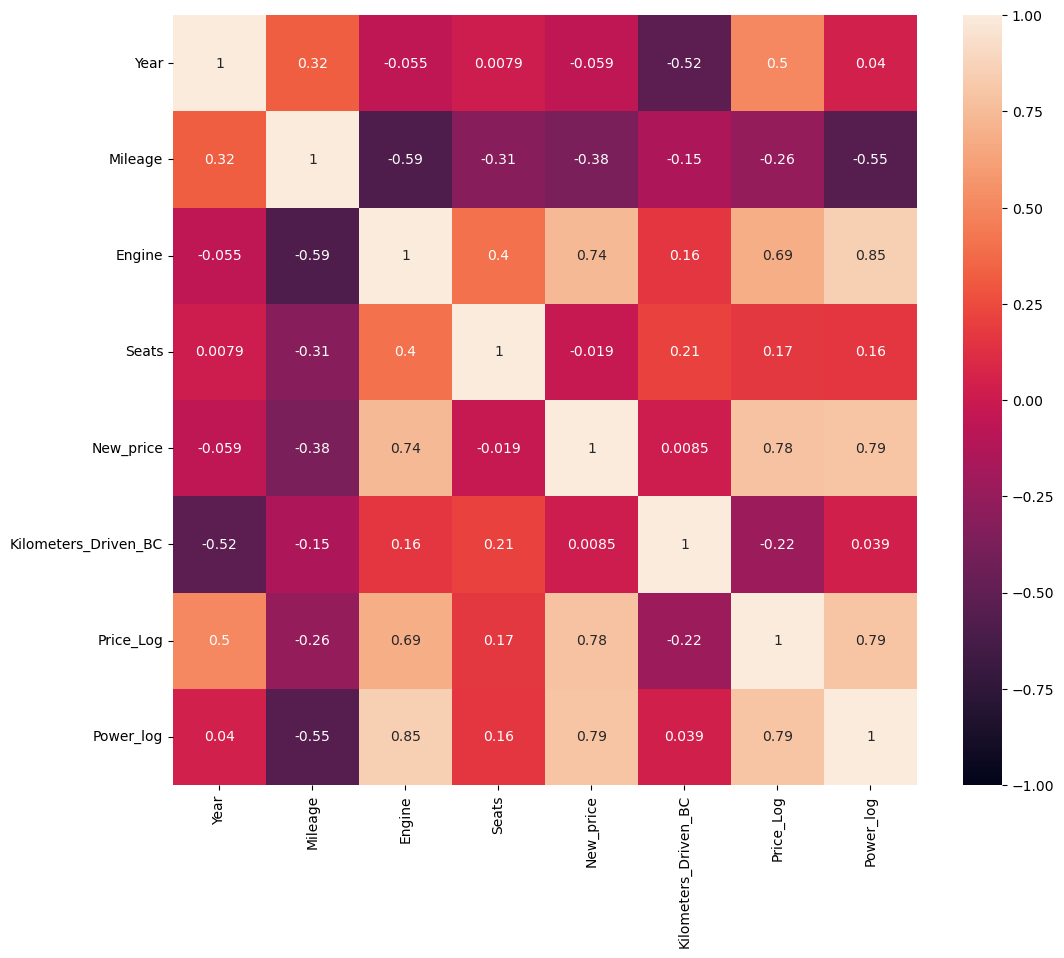

In [47]:
# We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize = (12, 10))

sns.heatmap(data.drop(["Power","Kilometers_Driven","Price"],axis = 1).corr(), 
            annot = True, vmin = -1, vmax = 1)

plt.show()

### **2. Scatter plot**
A scatter plot allows us to see relationships between two variables. 

**Note: Use log transformed values 'kilometers_driven_log' and 'price_log'**

<AxesSubplot: xlabel='Price_Log'>

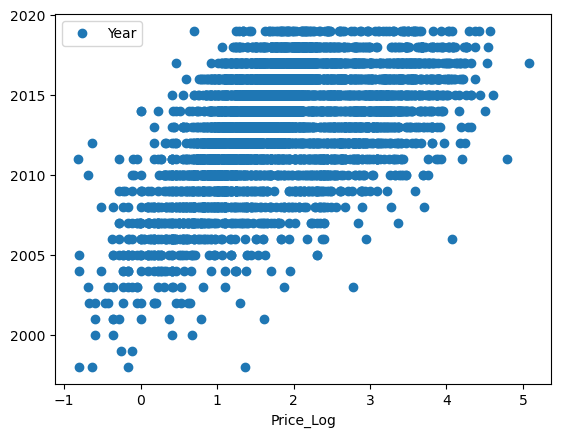

In [48]:
# Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x = 'Price_Log', y = 'Year', style = 'o')

<AxesSubplot: xlabel='Price_Log'>

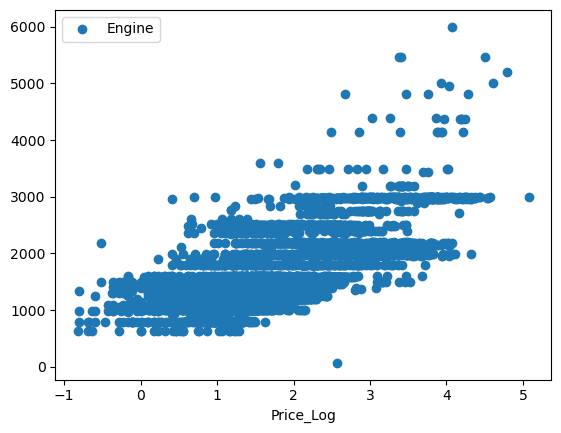

In [49]:
data.plot(x = 'Price_Log', y = 'Engine', style = 'o')

<AxesSubplot: xlabel='Price_Log'>

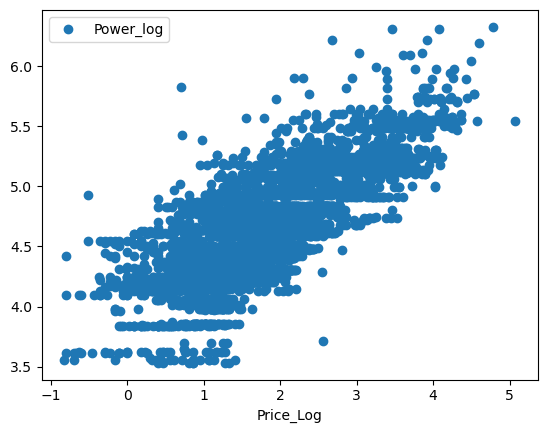

In [50]:
data.plot(x = 'Price_Log', y = 'Power_log', style = 'o')

<AxesSubplot: xlabel='Price_Log'>

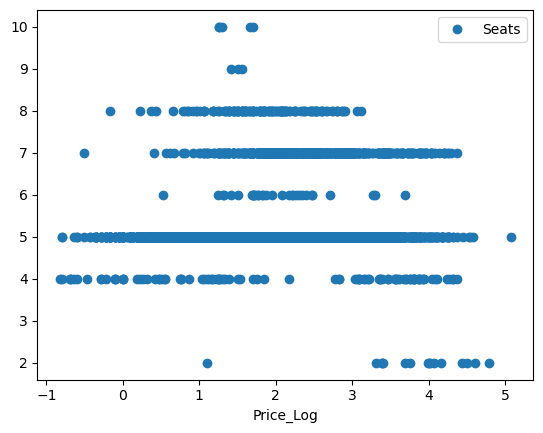

In [51]:
data.plot(x = 'Price_Log', y = 'Seats', style = 'o')

<AxesSubplot: xlabel='Price_Log'>

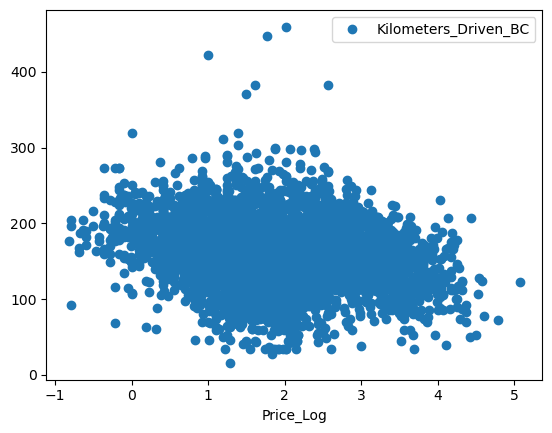

In [52]:
data.plot(x = 'Price_Log', y = 'Kilometers_Driven_BC', style = 'o')

<AxesSubplot: xlabel='Mileage'>

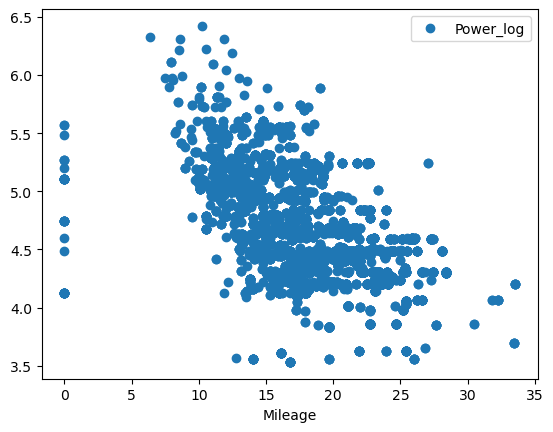

In [53]:
data.plot(x = 'Mileage', y = 'Power_log', style = 'o')

<AxesSubplot: xlabel='Engine'>

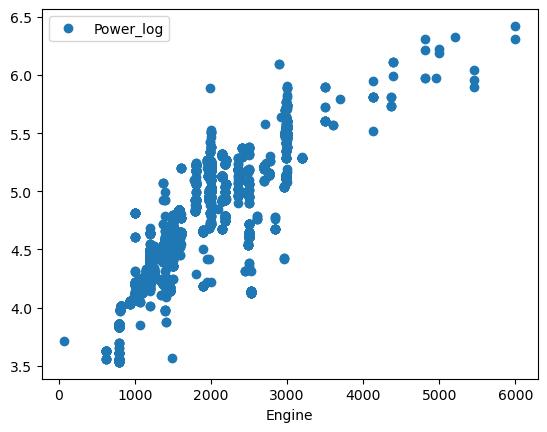

In [54]:
data.plot(x = 'Engine', y = 'Power_log', style = 'o')

<AxesSubplot: xlabel='Mileage'>

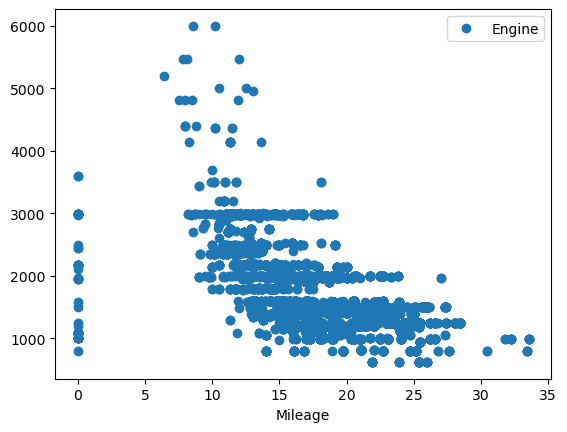

In [55]:
data.plot(x = 'Mileage', y = 'Engine', style = 'o')

<AxesSubplot: xlabel='Kilometers_Driven_BC'>

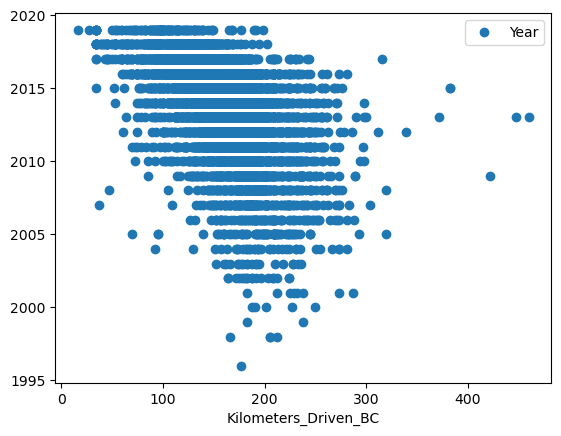

In [56]:
data.plot(x = 'Kilometers_Driven_BC', y = 'Year', style = 'o')

<AxesSubplot: xlabel='Mileage'>

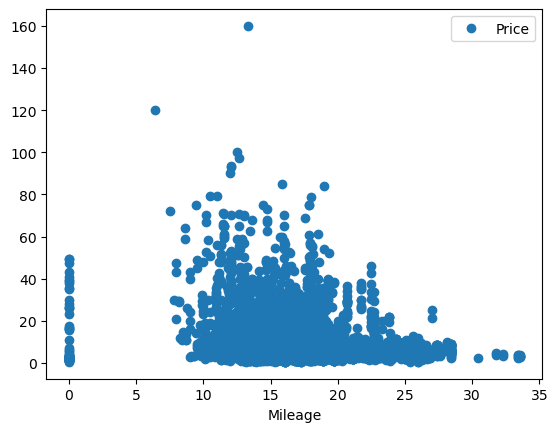

In [57]:
data.plot(x = 'Mileage', y = 'Price', style = 'o')

**Observations and Insights from all plots:**
 * Price seems to increase as the year of the car is newer - this makes sense as new general public cars depreciate in value as they age. Price also seems to be positively correlated with engine and power, which also makes sense as a higher performing automobile is more expensive to research and manufacture.
 * Although price and and kilometers driven show a small negative correlation, the trend reveals that the data is very noisy.
 * As engine power decreases, mileage generally tends to increase.
 * There is a slight tend of seeing older models have higher kilometers driven. Intuitively this makes sense as older vehicles have had more time to drive, but the data is very noisy for this relation.


### **3. Box plot**

In [58]:
# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    
    plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
    sns.boxplot(x = z, y = data['Price']) # Defining x and y
    
    plt.show()
    
    plt.figure(figsize = (12, 5))
    
    plt.title('Without Outliers')
    
    sns.boxplot(x = z, y = data['Price'], showfliers = False) # Turning off the outliers
    
    plt.show()

#### Let us now plot bivariate analysis of target variable with a categorical variable 'Location'

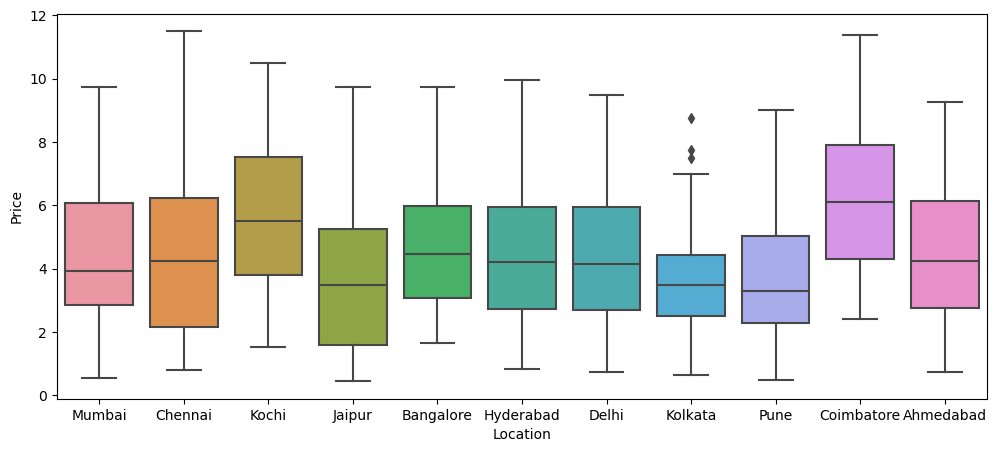

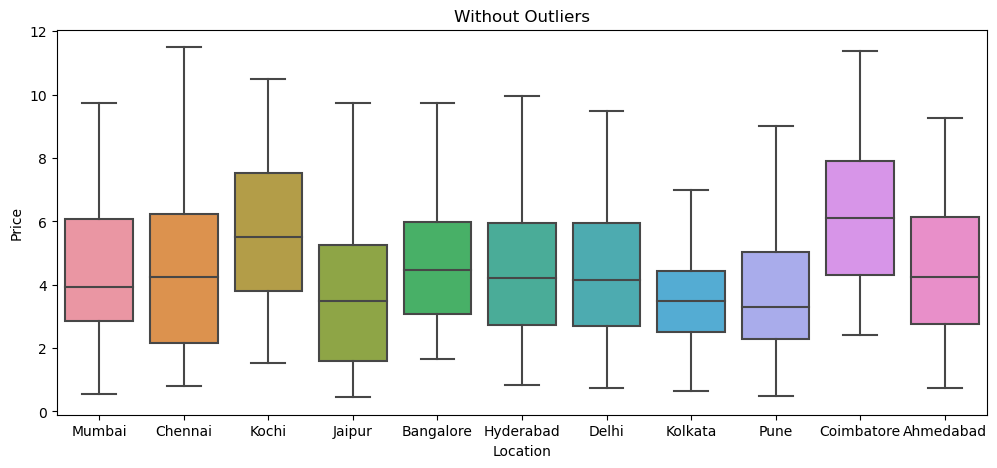

In [59]:
#Plotting car prices for specific Makes based on location:
data_carloc = pd.DataFrame(data = data["Location"])
data_carloc["Price"] = data["Price"]
data_carloc["Make"] = data["Make"]
data_carloc_Make = data_carloc[(data_carloc["Make"] == "Maruti")]
boxplot(data_carloc_Make['Location'])

In [60]:
#Checking average price value by location.
data_carloc.groupby(["Location"])["Price"].mean()

Location
Ahmedabad      8.457321
Bangalore     13.328631
Chennai        7.753623
Coimbatore    15.078223
Delhi          9.707726
Hyderabad      9.776550
Jaipur         5.809225
Kochi         11.179186
Kolkata        5.661215
Mumbai         9.429329
Pune           6.726254
Name: Price, dtype: float64

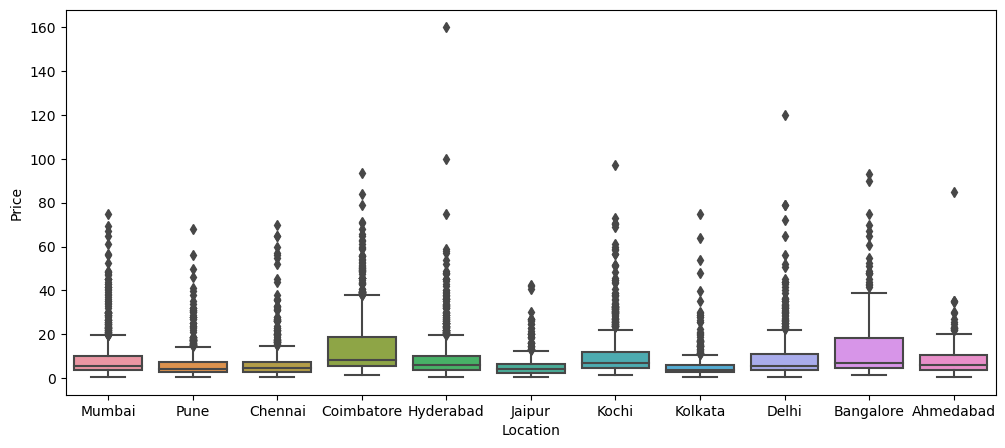

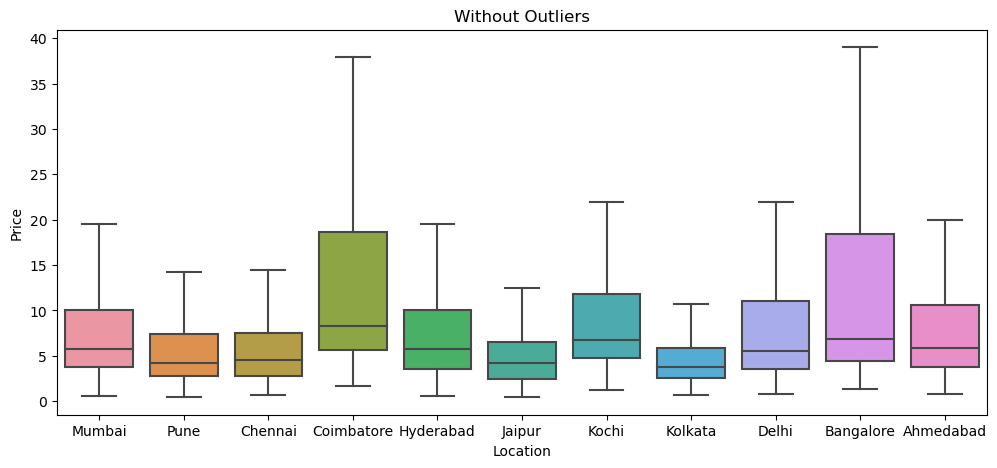

In [61]:
# Box Plot: Price vs Location
boxplot(data['Location'])

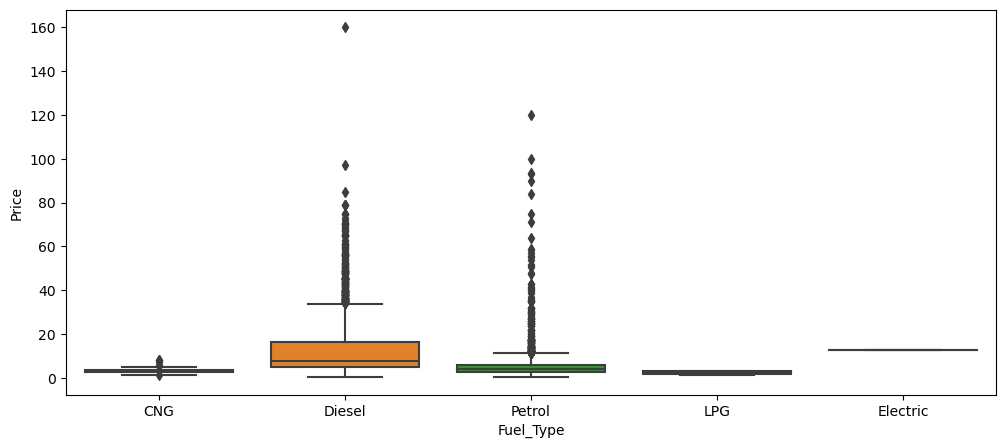

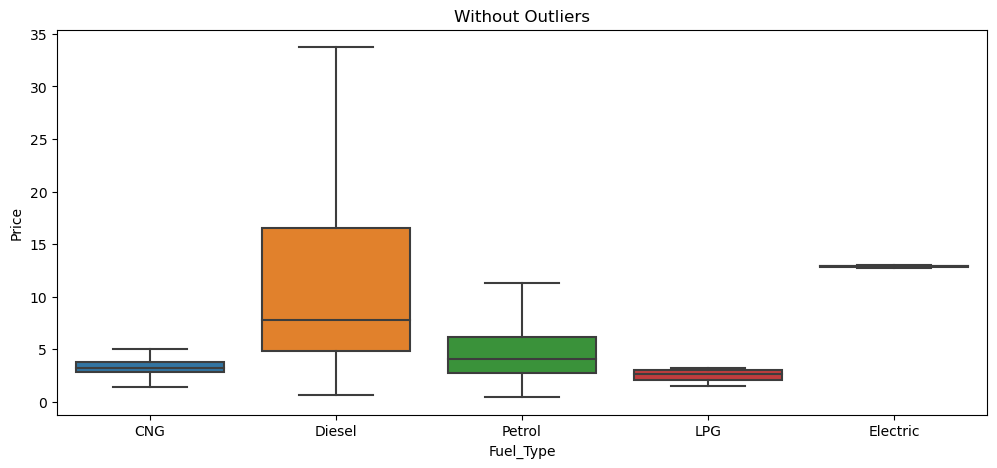

In [62]:
boxplot(data['Fuel_Type'])

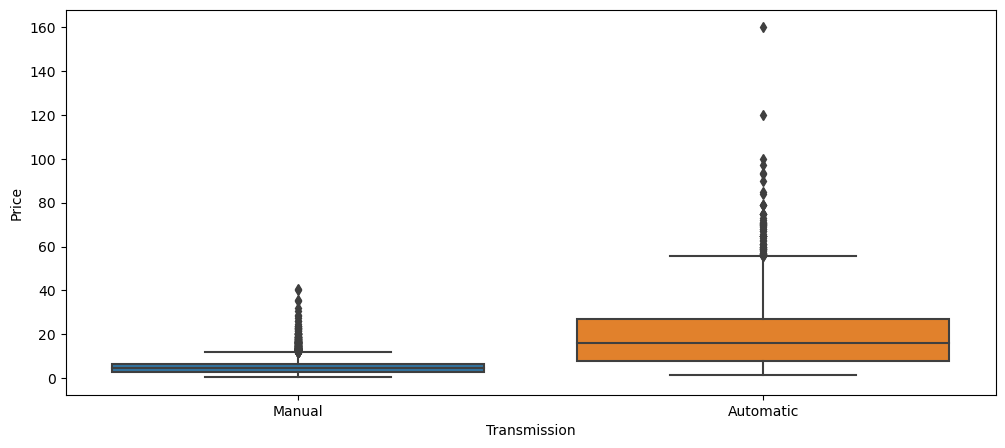

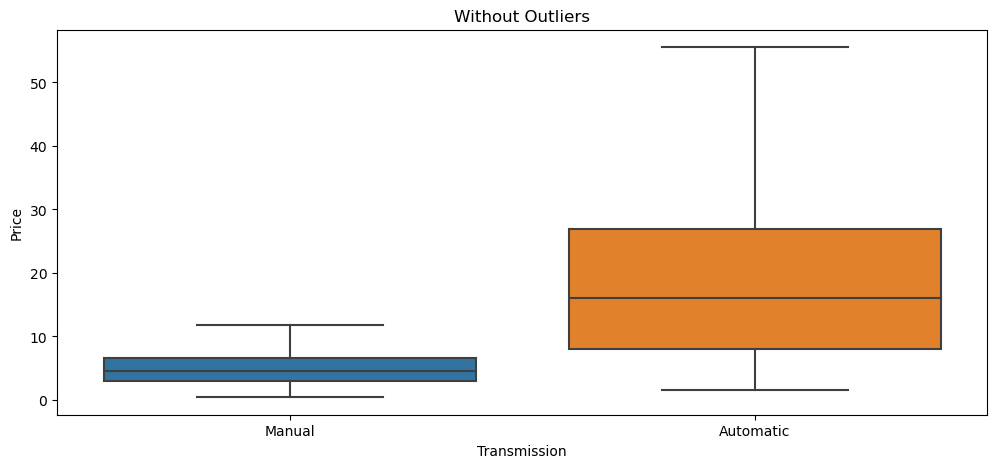

In [63]:
boxplot(data['Transmission'])

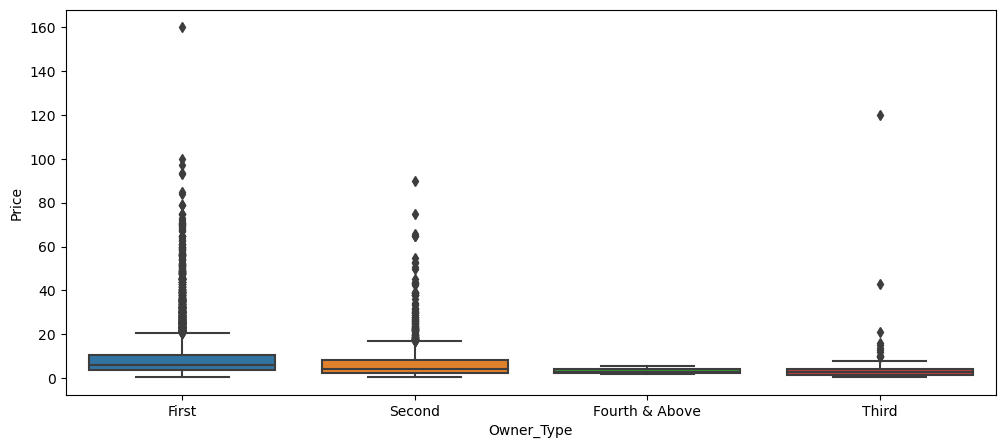

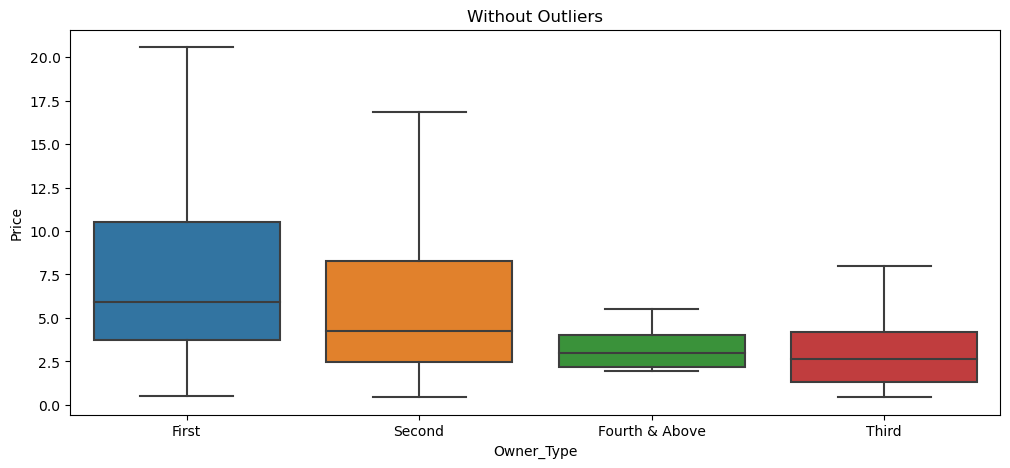

In [64]:
boxplot(data['Owner_Type'])

In [65]:
# Trimming down data to only plot boxplots of the top 17 Makes by count.
data_Make = pd.DataFrame(data = data["Make"])
data_Make["Price"] = data["Price"]
OrderMake = data_Make.Make.value_counts()
TopBrands = list(OrderMake[0:20].index)

data_MakeTop = data_Make[data_Make["Make"].isin(TopBrands)]

#Removing NAN price values
data_MakeTop.dropna(axis = 0, how = "any",inplace = True)

    

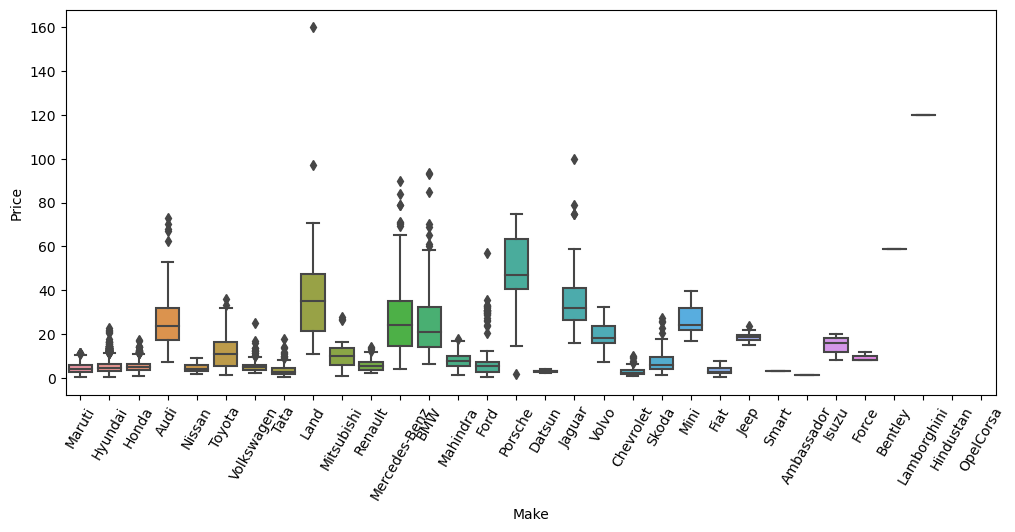

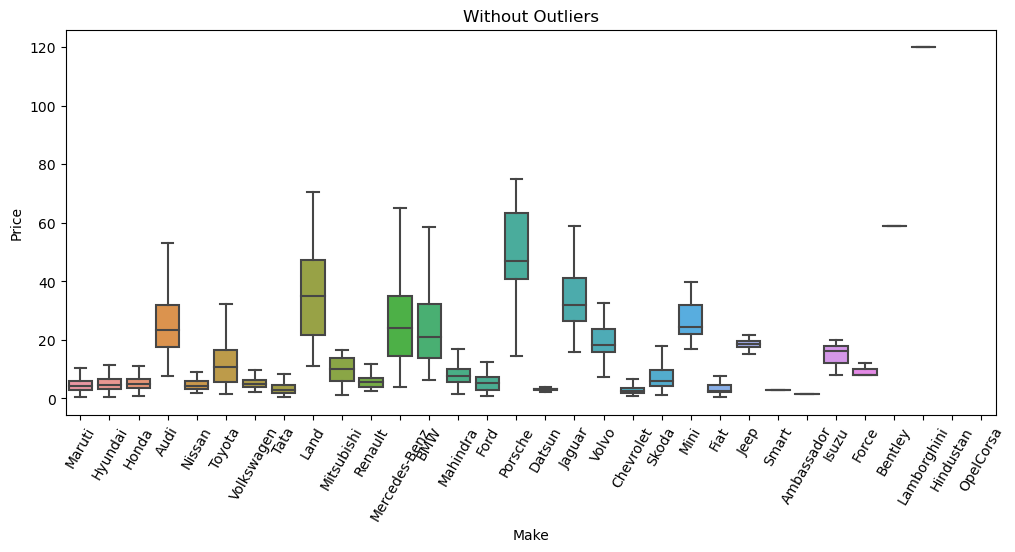

In [66]:
# Plotting Make on rotated axis for readibility
m = data_Make["Make"]

plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
sns.boxplot(x = m, y = data['Price']) # Defining x and y
plt.tick_params(axis = 'x', rotation = 60)

plt.show()
    
plt.figure(figsize = (12, 5))
    
plt.title('Without Outliers')
    
sns.boxplot(x = m, y = data['Price'], showfliers = False) # Turning off the outliers
plt.tick_params(axis = 'x', rotation = 60)

plt.show()

In [67]:
#Checking average price value by brand.
data.groupby(["Make"])["Price"].mean()

Make
Ambassador         1.350000
Audi              25.537712
BMW               25.243146
Bentley           59.000000
Chevrolet          3.044463
Datsun             3.049231
Fiat               3.269286
Force              9.333333
Ford               6.889400
Hindustan               NaN
Honda              5.411743
Hyundai            5.343433
Isuzu             14.696667
Jaguar            37.632250
Jeep              18.718667
Lamborghini      120.000000
Land              39.259500
Mahindra           8.045919
Maruti             4.517267
Mercedes-Benz     26.809874
Mini              26.896923
Mitsubishi        11.058889
Nissan             4.738352
OpelCorsa               NaN
Porsche           48.348333
Renault            5.799034
Skoda              7.559075
Smart              3.000000
Tata               3.562849
Toyota            11.580024
Volkswagen         5.307270
Volvo             18.802857
Name: Price, dtype: float64

In [68]:
#Showing list of plotted car brands
TopBrands

['Maruti',
 'Hyundai',
 'Honda',
 'Toyota',
 'Mercedes-Benz',
 'Volkswagen',
 'Ford',
 'Mahindra',
 'BMW',
 'Audi',
 'Tata',
 'Skoda',
 'Renault',
 'Chevrolet',
 'Nissan',
 'Land',
 'Jaguar',
 'Fiat',
 'Mitsubishi',
 'Mini']

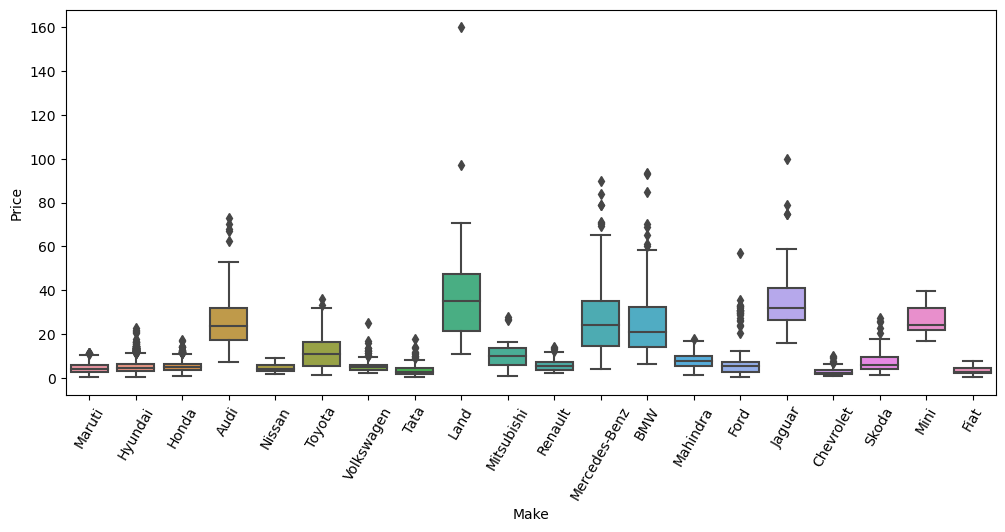

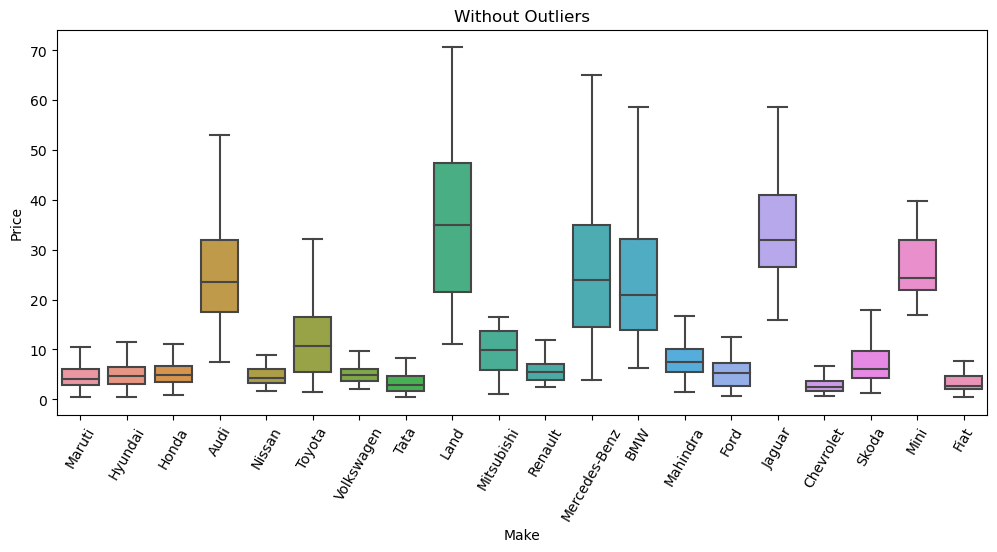

In [69]:
m = data_MakeTop["Make"]

plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
sns.boxplot(x = m, y = data['Price']) # Defining x and y
plt.tick_params(axis = 'x', rotation = 60)

plt.show()
    
plt.figure(figsize = (12, 5))
    
plt.title('Without Outliers')
    
sns.boxplot(x = m, y = data['Price'], showfliers = False) # Turning off the outliers
plt.tick_params(axis = 'x', rotation = 60)

plt.show()

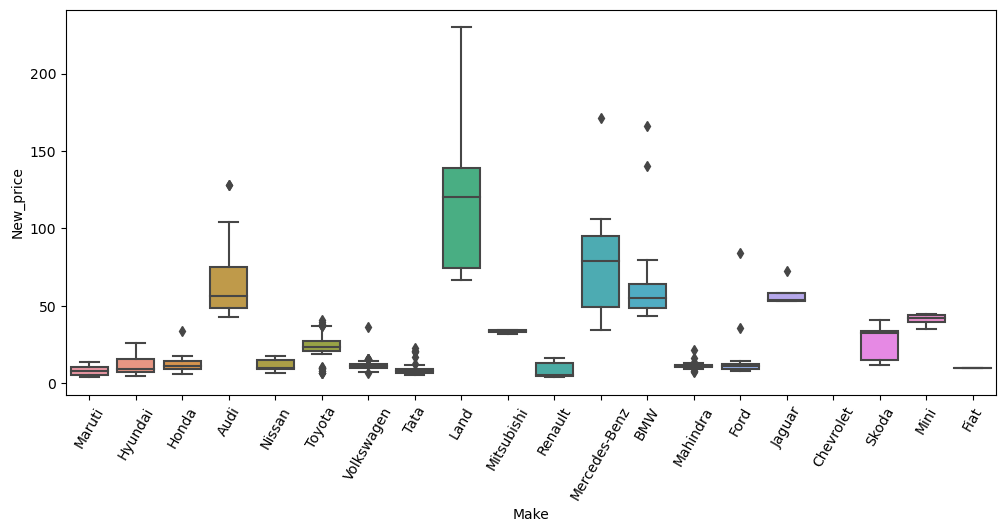

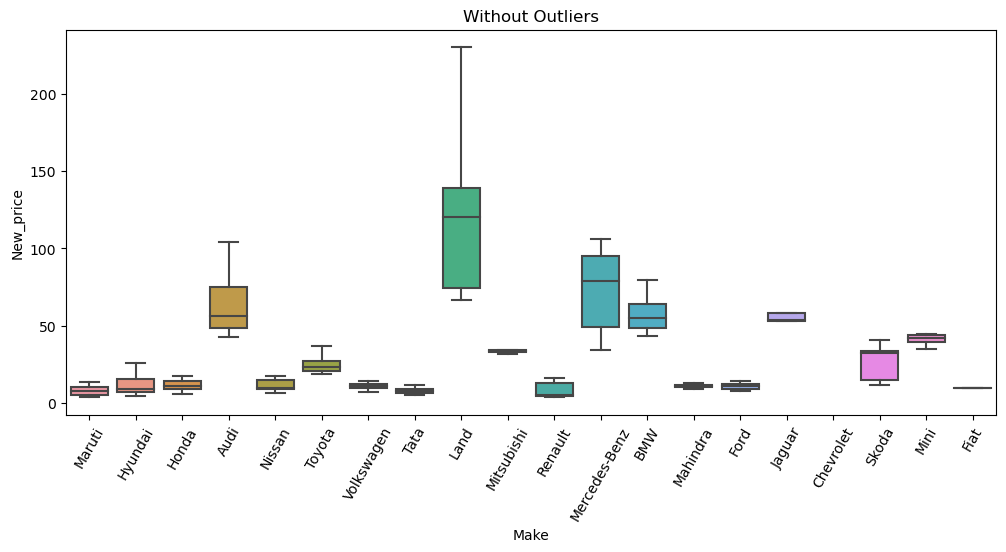

In [70]:
m = data_MakeTop["Make"]

plt.figure(figsize = (12, 5)) # Setting size of boxplot
    
sns.boxplot(x = m, y = data['New_price']) # Defining x and y
plt.tick_params(axis = 'x', rotation = 60)

plt.show()
    
plt.figure(figsize = (12, 5))
    
plt.title('Without Outliers')
    
sns.boxplot(x = m, y = data['New_price'], showfliers = False) # Turning off the outliers
plt.tick_params(axis = 'x', rotation = 60)

plt.show()

**Observations and Insights for all plots:**
 * It seems that, in general, prive ranges can be broken into three groups by location:
   * **Most Expensive:**
     * Coimbatore
     * Bangalore
   * **Middle Expensive:**
     * Mumbai
     * Hyderabad
     * Kochi
     * Dehli
     * Ahemdabad
   * **Least Expensive:**
     * Kolkata
     * Jaipur
     * Pune
     * Chennai
 * Diesel cars are both the most prevelant type of car on the road, as well as selling for the highest price. Petrol is the second most prevelant and second most expensive - however, petrol also seems to have the widest amount of outliers as well.
 * In general, it appears that price depreciates as the car has been resold.
 * The brand of the car appears to have a large impact on the price of the vehicle, where we can see luxury brands such as Land, Porsche, and Jaguar have a much higher distribution of sale prices.

### **Feature Engineering**

In [71]:
# Combining Make and Model together for sake of imputing data.
data["Make_Model"] = data["Make"] + "_" + data["Model"]
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info,Kilometers_Driven_BC,Price_Log,Power_log,Make_Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon,R LXI CNG,184.125969,0.559616,4.063198,Maruti_Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta,1.6 CRDi SX Option,148.032418,2.525729,4.837868,Hyundai_Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz,V,154.791723,1.504077,4.485260,Honda_Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga,VDI,198.103701,1.791759,4.485936,Maruti_Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4,New 2.0 TDI Multitronic,147.568767,2.875822,4.947340,Audi_A4


### **Missing value treatment**

In [72]:
# Now check the missing values of each column. 
data.isnull().sum()

Name                       0
Location                   0
Year                       0
Kilometers_Driven          0
Fuel_Type                  0
Transmission               0
Owner_Type                 0
Mileage                    2
Engine                    46
Power                    175
Seats                     53
New_price               6247
Price                   1234
Make                       0
Model                      0
Car_Info                   0
Kilometers_Driven_BC       0
Price_Log               1234
Power_log                175
Make_Model                 0
dtype: int64

#### **Observations and Insights: **
 * New_price is missing in almost every column - may still be able to fill in some values using other lines as reference. If that still does not make a large change, may be more sensical to remove it.
 * Price is the second highest column of missing values - since this is the target variable of the data set, we should not try to fill missing values though. Will drop these columns once we start model building.
 * Other columns can likely be filled with a median/ average based on similar columns. Some manually inputted values may be needed, but can be handled on a case by case basis.

**Missing values in Seats**

In [73]:
#Checking missing Seats data
data[(data["Seats"].isnull() == True)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info,Kilometers_Driven_BC,Price_Log,Power_log,Make_Model
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,2.95,Honda,City,1.5 GXI,171.587445,1.081805,NaN,Honda_City
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11,Maruti,Swift,1.3 VXi,149.424864,0.746688,NaN,Maruti_Swift
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.00,1498.0,99.0,NaN,NaN,3.60,Ford,Figo,Diesel,182.568218,1.280934,4.59512,Ford_Figo
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75,Maruti,Swift,1.3 VXi,207.265339,0.559616,NaN,Maruti_Swift
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,NaN,26.50,Land,Rover,Range Rover 3.0 D,165.895535,3.277145,NaN,Land_Rover
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20,Honda,City,1.3 DX,165.900210,1.163151,NaN,Honda_City
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80,Maruti,Swift,1.3 ZXI,160.243396,1.757858,NaN,Maruti_Swift
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,NaN,1.50,Honda,City,1.5 GXI,220.643734,0.405465,NaN,Honda_City
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.00,NaN,NaN,NaN,NaN,40.88,Land,Rover,Range Rover Sport 2005 2012 Sport,181.198195,3.710641,NaN,Land_Rover
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.0,NaN,NaN,1.70,Honda,City,1.5 EXI,198.980585,0.530628,4.60517,Honda_City


In [74]:
#Testing data grab for specific make_model
data[(data["Make_Model"] == "Maruti_Swift")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info,Kilometers_Driven_BC,Price_Log,Power_log,Make_Model
12,Maruti Swift VDI BSIV,Jaipur,2015,64424,Diesel,Manual,First,25.20,1248.0,74.0,5.0,NaN,5.60,Maruti,Swift,VDI BSIV,176.372396,1.722767,4.304065,Maruti_Swift
17,Maruti Swift DDiS VDI,Jaipur,2017,25000,Diesel,Manual,First,28.40,1248.0,74.0,5.0,NaN,5.99,Maruti,Swift,DDiS VDI,122.127171,1.790091,4.304065,Maruti_Swift
51,Maruti Swift LDI,Delhi,2014,52000,Diesel,Manual,First,22.90,1248.0,74.0,5.0,NaN,4.25,Maruti,Swift,LDI,162.327543,1.446919,4.304065,Maruti_Swift
52,Maruti Swift Ldi BSIV,Kolkata,2014,53000,Diesel,Manual,First,17.80,1248.0,75.0,5.0,NaN,3.30,Maruti,Swift,Ldi BSIV,163.530303,1.193922,4.317488,Maruti_Swift
53,Maruti Swift VDI,Delhi,2013,65650,Diesel,Manual,First,28.40,1248.0,74.0,5.0,NaN,3.85,Maruti,Swift,VDI,177.664032,1.348073,4.304065,Maruti_Swift
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,Maruti Swift Vdi BSIII,Pune,2007,102000,Diesel,Manual,First,17.80,1248.0,75.0,5.0,NaN,NaN,Maruti,Swift,Vdi BSIII,210.658596,NaN,4.317488,Maruti_Swift
7130,Maruti Swift Dzire VDI,Kolkata,2014,32000,Diesel,Manual,First,26.59,1248.0,74.0,5.0,NaN,NaN,Maruti,Swift,Dzire VDI,134.443744,NaN,4.304065,Maruti_Swift
7171,Maruti Swift Dzire 1.2 Vxi BSIV,Delhi,2011,72329,Petrol,Manual,First,17.50,1197.0,85.8,5.0,NaN,NaN,Maruti,Swift,Dzire 1.2 Vxi BSIV,184.450983,NaN,4.452019,Maruti_Swift
7192,Maruti Swift Dzire VXi,Chennai,2012,35161,Petrol,Manual,First,17.50,1298.0,85.8,5.0,NaN,NaN,Maruti,Swift,Dzire VXi,139.458017,NaN,4.452019,Maruti_Swift


In [75]:
# Creating new list for seats, filling missing values

UpdateSeats = []

for i in range(0,len(data)):
    if data.Seats.isnull()[i] == True:
        UpdateSeats.append(data[(data["Make_Model"] == data["Make_Model"][i])]["Seats"].median())
    else :
        UpdateSeats.append(data.Seats[i])
    
data["UpdateSeats"] = UpdateSeats

In [76]:
# Checking for any remaining missing values
data[(data["UpdateSeats"].isnull() == True)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info,Kilometers_Driven_BC,Price_Log,Power_log,Make_Model,UpdateSeats
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.50,Maruti,Estilo,LXI,167.056483,0.405465,NaN,Maruti_Estilo,NaN
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,2.50,Maruti,Estilo,LXI,146.620203,0.916291,NaN,Maruti_Estilo,NaN
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.75,Maruti,Estilo,LXI,161.110389,0.559616,NaN,Maruti_Estilo,NaN


In [77]:
#Verify - this car does not have any seat values in the data set.
data[(data["Make_Model"] == "Maruti_Estilo")]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info,Kilometers_Driven_BC,Price_Log,Power_log,Make_Model,UpdateSeats
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.50,Maruti,Estilo,LXI,167.056483,0.405465,NaN,Maruti_Estilo,NaN
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,2.50,Maruti,Estilo,LXI,146.620203,0.916291,NaN,Maruti_Estilo,NaN
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.75,Maruti,Estilo,LXI,161.110389,0.559616,NaN,Maruti_Estilo,NaN


In [78]:
#Maruti Estilo is a 5 seater car. Manually fill in data and verify errors fixed.
data["UpdateSeats"][2369] = 5.0
data["UpdateSeats"][3882] = 5.0
data["UpdateSeats"][5893] = 5.0

data[(data["UpdateSeats"].isnull() == True)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info,Kilometers_Driven_BC,Price_Log,Power_log,Make_Model,UpdateSeats


**Missing values for Mileage**

In [79]:
# Now check missing values of each column.
data[(data["Mileage"].isnull() == True)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info,Kilometers_Driven_BC,Price_Log,Power_log,Make_Model,UpdateSeats
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,Mahindra,E,Verito D4,159.878380,2.564949,3.713572,Mahindra_E,5.0
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,12.75,Toyota,Prius,2009-2016 Z4,152.145353,2.545531,4.290459,Toyota_Prius,5.0


In [80]:
# Impute missing Mileage. Take median mileage from other cars from same year.
data["Mileage"][4446] = data[(data["Year"] == data["Year"][4446])]["Mileage"].median()
data["Mileage"][4904] = data[(data["Year"] == data["Year"][4904])]["Mileage"].median()

In [81]:
#Verify
data[(data["Mileage"].isnull() == True)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info,Kilometers_Driven_BC,Price_Log,Power_log,Make_Model,UpdateSeats


In [82]:
#Recall - there were also 83 values with 0 mileage. This can be fixed using a similar method:
UpdateMileage = []

for i in range(0,len(data)):
    if data.Mileage[i] == 0:
        UpdateMileage.append(data[(data["Make_Model"] == data["Make_Model"][i])]["Mileage"].median())
    else :
        UpdateMileage.append(data.Mileage[i])
    
data["UpdateMileage"] = UpdateMileage

In [83]:
data[(data["UpdateMileage"] == 0)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info,Kilometers_Driven_BC,Price_Log,Power_log,Make_Model,UpdateSeats,UpdateMileage
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14,35.67,Mercedes-Benz,C-Class,Progressive C 220d,100.998884,3.574310,5.267858,Mercedes-Benz_C-Class,5.0,0.0
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,NaN,3.00,Smart,Fortwo,CDI AT,211.453719,1.098612,NaN,Smart_Fortwo,2.0,0.0
962,Mercedes-Benz C-Class Progressive C 220d,Mumbai,2018,8682,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,52.26,39.50,Mercedes-Benz,C-Class,Progressive C 220d,80.716775,3.676301,5.267858,Mercedes-Benz_C-Class,5.0,0.0
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,NaN,6.99,Mahindra,Jeep,MM 550 PE,124.007357,1.944481,NaN,Mahindra_Jeep,6.0,0.0
4629,Fiat Siena 1.2 ELX,Jaipur,2001,70000,Petrol,Manual,Third,0.0,1242.0,NaN,5.0,NaN,0.55,Fiat,Siena,1.2 ELX,182.130152,-0.597837,NaN,Fiat_Siena,5.0,0.0
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,49.14,35.00,Mercedes-Benz,C-Class,Progressive C 220d,59.390470,3.555348,5.267858,Mercedes-Benz_C-Class,5.0,0.0
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,NaN,6.0,NaN,1.70,Mahindra,Jeep,MM 540 DP,187.056396,0.530628,NaN,Mahindra_Jeep,6.0,0.0


In [84]:
#Manually fill in values
data["UpdateMileage"][67] = 11.69
data["UpdateMileage"][915] = 11.47
data["UpdateMileage"][962] = 11.69
data["UpdateMileage"][2053] = 10.00
data["UpdateMileage"][4629] = 16.50
data["UpdateMileage"][5875] = 11.69
data["UpdateMileage"][5943] = 10.00

data[(data["UpdateMileage"] == 0)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info,Kilometers_Driven_BC,Price_Log,Power_log,Make_Model,UpdateSeats,UpdateMileage


Seats 
    Green = Mean of value 18.31 
    Black = Median of value 18.16 
    Skew = 0.203


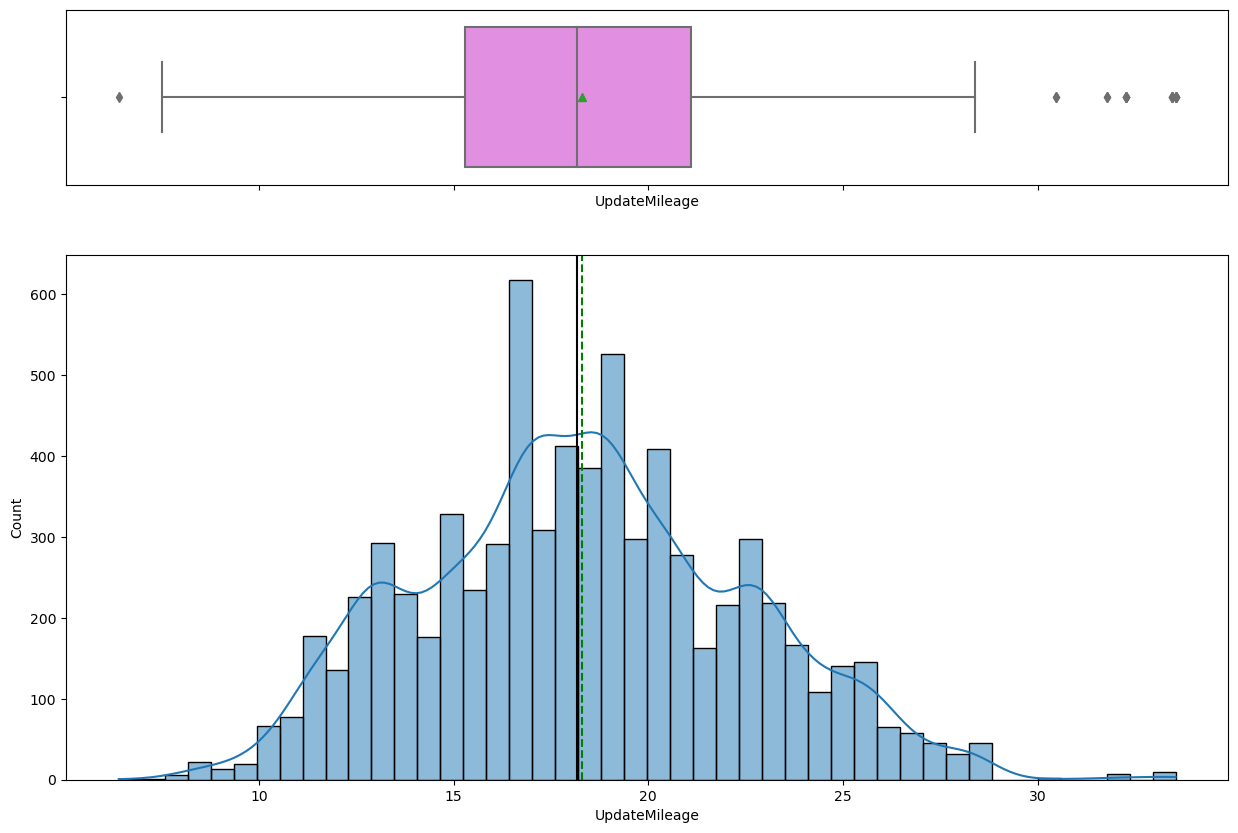

In [85]:
    print(col,"\n","   Green = Mean of value",round(data["UpdateMileage"].mean(),2),"\n",
          "   Black = Median of value",round(data["UpdateMileage"].median(),2),"\n"
          "    Skew =",round(stats.skew(data["UpdateMileage"],nan_policy = "omit"),3)
         )                     
    histogram_boxplot(data,"UpdateMileage")
    plt.show()

**Missing values for Engine**

In [86]:
# Creating new list for engine, filling missing values
UpdateEngine = []

for i in range(0,len(data)):
    if data.Engine.isnull()[i] == True:
        UpdateEngine.append(data[(data["Make_Model"] == data["Make_Model"][i])]["Engine"].median())
    else :
        UpdateEngine.append(data.Engine[i])
    
data["UpdateEngine"] = UpdateEngine

In [87]:
data[(data["UpdateEngine"].isnull() == True)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info,Kilometers_Driven_BC,Price_Log,Power_log,Make_Model,UpdateSeats,UpdateMileage,UpdateEngine


**Missing values for Power**

In [88]:
# Creating new list for power, take log, filling missing values
UpdatePower = []

for i in range(0,len(data)):
    if data.Power.isnull()[i] == True:
        UpdatePower.append(data[(data["Make_Model"] == data["Make_Model"][i])]["Power"].median())
    else :
        UpdatePower.append(data.Power[i])
    
data["UpdatePower_log"] = np.log(UpdatePower)

In [89]:
#Check for missing values
data[(data["UpdatePower_log"].isnull() == True)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info,Kilometers_Driven_BC,Price_Log,Power_log,Make_Model,UpdateSeats,UpdateMileage,UpdateEngine,UpdatePower_log
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,NaN,3.00,Smart,Fortwo,CDI AT,211.453719,1.098612,NaN,Smart_Fortwo,2.0,11.47,799.0,NaN
926,Porsche Cayman 2009-2012 S,Hyderabad,2010,10000,Petrol,Manual,First,9.0,3436.0,NaN,2.0,NaN,40.00,Porsche,Cayman,2009-2012 S,85.332547,3.688879,NaN,Porsche_Cayman,2.0,9.00,3436.0,NaN
1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.5,1242.0,NaN,5.0,NaN,0.85,Fiat,Petra,1.2 EL,224.297536,-0.162519,NaN,Fiat_Petra,5.0,15.50,1242.0,NaN
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.0,2498.0,NaN,6.0,NaN,6.99,Mahindra,Jeep,MM 550 PE,124.007357,1.944481,NaN,Mahindra_Jeep,6.0,10.00,2498.0,NaN
2305,Porsche Cayman 2009-2012 S tiptronic,Mumbai,2011,8000,Petrol,Automatic,First,9.0,3436.0,NaN,2.0,NaN,43.00,Porsche,Cayman,2009-2012 S tiptronic,78.156466,3.761200,NaN,Porsche_Cayman,2.0,9.00,3436.0,NaN
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.50,Maruti,Estilo,LXI,167.056483,0.405465,NaN,Maruti_Estilo,5.0,19.50,1061.0,NaN
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,2.50,Maruti,Estilo,LXI,146.620203,0.916291,NaN,Maruti_Estilo,5.0,19.50,1061.0,NaN
4629,Fiat Siena 1.2 ELX,Jaipur,2001,70000,Petrol,Manual,Third,0.0,1242.0,NaN,5.0,NaN,0.55,Fiat,Siena,1.2 ELX,182.130152,-0.597837,NaN,Fiat_Siena,5.0,16.50,1242.0,NaN
4709,Maruti 1000 AC,Hyderabad,1998,104000,Petrol,Manual,Second,15.0,970.0,NaN,5.0,NaN,0.85,Maruti,1000,AC,212.244082,-0.162519,NaN,Maruti_1000,5.0,15.00,970.0,NaN
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,NaN,1.75,Maruti,Estilo,LXI,161.110389,0.559616,NaN,Maruti_Estilo,5.0,19.50,1061.0,NaN


In [90]:
#Manually fill data by manually looking up engine specs on each car:
UpdatePower[915] = 71*.99
UpdatePower[926] = 320*.99
UpdatePower[1319] = 100
UpdatePower[2053] = 62
UpdatePower[2305] = 320*.99
UpdatePower[2369] = 65
UpdatePower[3882] = 65
UpdatePower[4629] = 103*.99
UpdatePower[4709] = 65
UpdatePower[5893] = 100
UpdatePower[5943] = 62
UpdatePower[6216] = 74*.99

data["Power"] = UpdatePower
data["UpdatePower_log"] = np.log(UpdatePower)

In [91]:
data[(data["UpdatePower_log"].isnull() == True)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Make,Model,Car_Info,Kilometers_Driven_BC,Price_Log,Power_log,Make_Model,UpdateSeats,UpdateMileage,UpdateEngine,UpdatePower_log


**Missing values for New_price**

In [92]:
UpdateNew_Price = []

for i in range(0,len(data)):
    if data.New_price.isnull()[i] == True:
        UpdateNew_Price.append(data[(data["Make_Model"] == data["Make_Model"][i])]["New_price"].mean())
                                   # (data["Location"] == data["Location"][i]) &
                                   # (data["Year"] == data["Year"][i])]["New_price"].median())
    else :
        UpdateNew_Price.append(data.New_price[i])
    
data["UpdateNew_Price"] = UpdateNew_Price

In [93]:
data.isnull().sum()

Name                       0
Location                   0
Year                       0
Kilometers_Driven          0
Fuel_Type                  0
Transmission               0
Owner_Type                 0
Mileage                    0
Engine                    46
Power                      0
Seats                     53
New_price               6247
Price                   1234
Make                       0
Model                      0
Car_Info                   0
Kilometers_Driven_BC       0
Price_Log               1234
Power_log                175
Make_Model                 0
UpdateSeats                0
UpdateMileage              0
UpdateEngine               0
UpdatePower_log            0
UpdateNew_Price         1512
dtype: int64

**Observations for missing values after imputing:**

 * Able to resolve issues with missing values in Seats, Engine, Mileage, and Power columns. 

 * New Price started out missing 86% of its data, and after trying to fill some using similar rows, still about 50% of data is missing. For now, plan to drop New Price column entirely from the data set.

 * Price missing values should not be filled since it is the dependent variable. Will plan to remove these rows from the initial analysis.

## **Proposed approach**

- **Potential techniques -** What different techniques should be explored?
  * Linear Regression Model
  * Ridge Regression Model
  * Lasso Regression Model
  * Decision Tree/ Random Forest
  * Bagging
     * Approaching missing values in New_Price?
  * Recommendation Systems?
 
- **Overall solution design -** What is the potential solution design?
  * With data cleaned and initially analyzed, the next steps will be to understand how each of the variables still present within the data affect the various techniques used to build models. 
  * Of the original data, the only factor being completely ignored is the New_Price as there were too many missing values to draw strong conclusions. 
  * Name, after being trimmed down to the Make/ Model of the car should provide an extra point of helpful insight.
  * Final solution should also be built to be able to input new data points, from vehicles being added to the data set, so that it is a usable calculator. For this, reversing the data transformations will need to be kept in mind.
  * After building and tuning multiple data sets, a final conclusion will be drawn and the model(s) with the greatest efficacy.
 
- **Measures of success -** What are the key measures of success?
  * Ability to accurately replicate the actual sale price of existing cars in the data set so that we can confidently input new rows and estimate a price.
  * Model take in a robust array of variables to make calculation to satisfy the companies differential pricing goals
    * We've already seen from initial analysis some effects of make, location, engine/ power, and year of vehicle. These's relationships should be expected to hold in the created model.

### **Saving the Data**

Please save the pre-processed dataset into a separate file so that we can continue without having to repeat the work we did in Milestone1. The stored data frame can be loaded into Milestone2 and implemented further.

To save the pre-processed data frame, please follow the below lines of code:

In [94]:
#Removing repeat columns for a "cleaned" dataframe.
df_cleaned = data.copy()
df_cleaned["Seats"] = data["UpdateSeats"]
df_cleaned["Mileage"] = data["UpdateMileage"]
df_cleaned["Engine"] = data["UpdateEngine"]
df_cleaned["Power_log"] = data["UpdatePower_log"]
df_cleaned["New_price"] = data["UpdateNew_Price"]

#Creating dummy variables for categorical values and manually dropping columns:
df_cleaned = pd.get_dummies(df_cleaned, columns = ["Fuel_Type","Transmission","Owner_Type", "Location"],
                           drop_first = True)

#Dropping Columns that aren't being used/ dummy variable to remove correlation.
df_cleaned = df_cleaned.drop(["Car_Info","Model","Make_Model","UpdateNew_Price",
                            "UpdateSeats","UpdateMileage","UpdateEngine","UpdatePower_log"],
                            axis = 1)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       7253 non-null   object 
 1   Year                       7253 non-null   int64  
 2   Kilometers_Driven          7253 non-null   int64  
 3   Mileage                    7253 non-null   float64
 4   Engine                     7253 non-null   float64
 5   Power                      7253 non-null   float64
 6   Seats                      7253 non-null   float64
 7   New_price                  5741 non-null   float64
 8   Price                      6019 non-null   float64
 9   Make                       7253 non-null   object 
 10  Kilometers_Driven_BC       7253 non-null   float64
 11  Price_Log                  6019 non-null   float64
 12  Power_log                  7253 non-null   float64
 13  Fuel_Type_Diesel           7253 non-null   uint8

In [95]:
# Synthetic Data Validation to replace missing New_price values
# !pip install sdv

In [96]:
#Convert dummy variables to dtype- int64 to be able to run SDV
for col in df_cleaned.columns:
    if df_cleaned[col].dtypes == "uint8":
        df_cleaned[col] = np.array(df_cleaned[col], dtype = "int64")
        
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       7253 non-null   object 
 1   Year                       7253 non-null   int64  
 2   Kilometers_Driven          7253 non-null   int64  
 3   Mileage                    7253 non-null   float64
 4   Engine                     7253 non-null   float64
 5   Power                      7253 non-null   float64
 6   Seats                      7253 non-null   float64
 7   New_price                  5741 non-null   float64
 8   Price                      6019 non-null   float64
 9   Make                       7253 non-null   object 
 10  Kilometers_Driven_BC       7253 non-null   float64
 11  Price_Log                  6019 non-null   float64
 12  Power_log                  7253 non-null   float64
 13  Fuel_Type_Diesel           7253 non-null   int64

In [97]:
from sdv import SDV
from sdv.tabular import GaussianCopula

model = GaussianCopula()
model.fit(df_cleaned)


In [98]:
df_cleaned_filled = model.sample(num_rows = 7253, randomize_samples = True,
                                batch_size = 300)
df_cleaned_filled.info("New_price")

Sampling rows: : 7500it [00:02, 2924.03it/s]                        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       7253 non-null   object 
 1   Year                       7253 non-null   int64  
 2   Kilometers_Driven          7253 non-null   int64  
 3   Mileage                    7253 non-null   float64
 4   Engine                     7253 non-null   float64
 5   Power                      7253 non-null   float64
 6   Seats                      7253 non-null   float64
 7   New_price                  5082 non-null   float64
 8   Price                      5463 non-null   float64
 9   Make                       7253 non-null   object 
 10  Kilometers_Driven_BC       7253 non-null   float64
 11  Price_Log                  5463 non-null   float64
 12  Power_log                  7253 non-null   float64
 13  Fuel_Type_Diesel           7253 non-null   int64

### Even after filling missing New_price values with mean values, by brand, and running SDV, we are still unable to fill the whole of the missing values. This variable will be dropped from the model.

In [99]:
#Removing rows with "Price" data missing:
df_cleaned.dropna(axis = 0, how = "any", subset = ["Price"], inplace = True)
df_cleaned = df_cleaned.drop(["New_price"], axis = 1)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       6019 non-null   object 
 1   Year                       6019 non-null   int64  
 2   Kilometers_Driven          6019 non-null   int64  
 3   Mileage                    6019 non-null   float64
 4   Engine                     6019 non-null   float64
 5   Power                      6019 non-null   float64
 6   Seats                      6019 non-null   float64
 7   Price                      6019 non-null   float64
 8   Make                       6019 non-null   object 
 9   Kilometers_Driven_BC       6019 non-null   float64
 10  Price_Log                  6019 non-null   float64
 11  Power_log                  6019 non-null   float64
 12  Fuel_Type_Diesel           6019 non-null   int64  
 13  Fuel_Type_Electric         6019 non-null   int64

In [100]:
# Assume df_cleaned is the pre-processed data frame in your code, then
df_cleaned.to_csv("cars_data_updated.csv", index = False)

In [101]:
df_cleaned.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,6019,1876,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.358199,3.269742,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,57661.95564,37878.584715,171.0,34000.0,53000.0,73000.0,775000.0
Mileage,6019.0,NaN,NaN,NaN,18.30149,4.182134,6.4,15.29,18.16,21.1,33.54
Engine,6019.0,NaN,NaN,NaN,1620.220967,600.503886,72.0,1198.0,1493.0,1984.0,5998.0
Power,6019.0,NaN,NaN,NaN,112.651768,53.835952,34.2,74.0,93.7,138.1,560.0
Seats,6019.0,NaN,NaN,NaN,5.277953,0.803778,2.0,5.0,5.0,5.0,10.0
Price,6019.0,NaN,NaN,NaN,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0
Make,6019,30,Maruti,1211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometers_Driven_BC,6019.0,NaN,NaN,NaN,161.454457,39.66195,16.011851,137.650043,163.530303,185.11103,459.612607


The above code helps to save the cleaned/pre-processed dataset into csv file, that can be further loaded into Milestone2.

([<matplotlib.axis.YTick at 0x1f4ae80a190>,
 [Text(0, 0, '0'),
  Text(0, 5, '5'),
  Text(0, 10, '10'),
  Text(0, 15, '15'),
  Text(0, 20, '20'),
  Text(0, 25, '25'),
  Text(0, 30, '30'),
  Text(0, 35, '35'),
  Text(0, 40, '40'),
  Text(0, 45, '45'),
  Text(0, 50, '50'),
  Text(0, 55, '55'),
  Text(0, 60, '60'),
  Text(0, 65, '65'),
  Text(0, 70, '70'),
  Text(0, 75, '75'),
  Text(0, 80, '80'),
  Text(0, 85, '85'),
  Text(0, 90, '90'),
  Text(0, 95, '95'),
  Text(0, 100, '100')])

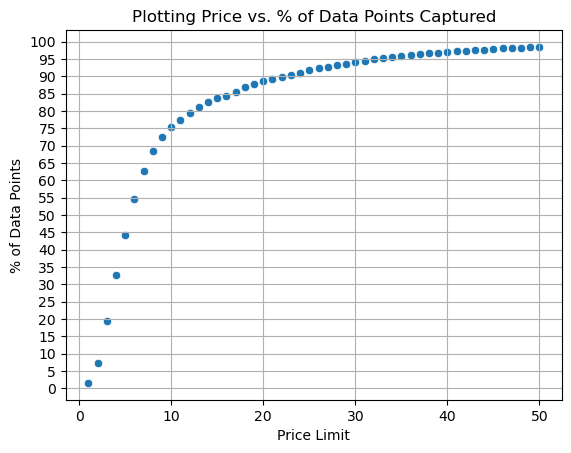

In [102]:
#Testing range of Price Data
PriceData = df_cleaned["Price"].copy()

CountSet = []
LimitSet = []
PercSet = []

for Limit in range(1,51,1):
    for i in range(0,len(df_cleaned["Price"]),1):
        if PriceData[i] <= Limit:
            CountSet.append(PriceData[i])
            
        else:
            pass
    LimitSet.append(Limit)    
    PercSet.append(len(CountSet) / len(PriceData) * 100)
    CountSet = []
    continue
    
#Plotting Data
PriceData = pd.DataFrame({"Price Limit": LimitSet, "% of Data Points": PercSet })
sns.scatterplot(data = PriceData, x = "Price Limit", y = "% of Data Points")
plt.grid()
plt.title("Plotting Price vs. % of Data Points Captured")
plt.yticks(range(0,105,5))


In [103]:
PriceData[(PriceData["Price Limit"] == 30)]

,Price Limit,% of Data Points
29,30,94.201695
